# KELOMPOK 4

### ANGGOTA

- Naufal Arya Raihasa

- Aziz Fatih Fauzi

- Laily Medha Nur Ihsaanti

### DATASET

- LINK : https://www.kaggle.com/competitions/home-credit-default-risk/overview

- DESKRIPSI : Data yang digunakan adalah data application.csv yang berisi variabel independen yaitu data dari klien yang melakukan peminjaman dan variabel dependen yaitu variabel TARGET yang berupa identifikasi klien yang mengalami kesulitan dalam membayar pinjaman dengan telat lebih dari X hari pada setidaknya satu dari Y pembayaran awal dalam sampel data. Jika klien memenuhi kriteria ini, maka nilai target akan diset sebagai 1, sedangkan untuk kasus lainnya akan diset sebagai 0.

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# SET MAX COLUMN AND ROW

In [ ]:
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Data

Mounted at /content/drive
/content/drive/MyDrive/Data


REDUCE FILE USE

In [ ]:
def reduce_data_size(df):
    """Reduce memory usage of a pandas dataframe by converting columns to smaller data types."""
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                for dtype in ['int8', 'int16', 'int32', 'int64']:
                    if c_min > np.iinfo(dtype).min and c_max < np.iinfo(dtype).max:
                        df[col] = df[col].astype(dtype)
                        break
                        
            else:
                for dtype in ['float16', 'float32', 'float64']:
                    if c_min > np.finfo(dtype).min and c_max < np.finfo(dtype).max:
                        df[col] = df[col].astype(dtype)
                        break
        else:
            df[col] = df[col].astype('category')

    return df

In [ ]:
data = pd.read_csv("application_train.csv")
df = data.copy()
df = reduce_data_size(df)
print('Memory usage of original data:')
print(data.memory_usage().sum() / 1024**2)
print('Memory usage of reduced data:')
print(df.memory_usage().sum() / 1024**2)

Memory usage of original data:
286.2270965576172
Memory usage of reduced data:
59.5390100479126


# EXPLORATORY DATA ANALYSIS

In [ ]:
df['TARGET'] = df['TARGET'].map({0: "No Payment Difficulties", 1: "Payment Difficulties"})

In [ ]:
# data info
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

feature data_type  null_num   null_pct  unique_num  \
0                      SK_ID_CURR     int32         0   0.000000      307511   
1                          TARGET    object         0   0.000000           2   
2              NAME_CONTRACT_TYPE  category         0   0.000000           2   
3                     CODE_GENDER  category         0   0.000000           3   
4                    FLAG_OWN_CAR  category         0   0.000000           2   
5                 FLAG_OWN_REALTY  category         0   0.000000           2   
6                    CNT_CHILDREN      int8         0   0.000000          15   
7                AMT_INCOME_TOTAL   float32         0   0.000000        2548   
8                      AMT_CREDIT   float32         0   0.000000        5603   
9                     AMT_ANNUITY   float32        12   0.003902       13672   
10                AMT_GOODS_PRICE   float32       278   0.090403        1002   
11                NAME_TYPE_SUITE  category      1292   0.420148           7   
12               NAME_INCOME_TYPE  category         0   0.000000           8   
13            NAME_EDUCATION_TYPE  category         0   0.000000           5   
14             NAME_FAMILY_STATUS  category         0   0.000000           6   
15              NAME_HOUSING_TYPE  category         0   0.000000           6   
16     REGION_POPULATION_RELATIVE   float16         0   0.000000          81   
17                     DAYS_BIRTH     int16         0   0.000000       17460   
18                  DAYS_EMPLOYED     int32         0   0.000000       12574   
19              DAYS_REGISTRATION   float16         0   0.000000        5282   
20                DAYS_ID_PUBLISH     int16         0   0.000000        6168   
21                    OWN_CAR_AGE   float16    202929  65.990810          62   
22                     FLAG_MOBIL      int8         0   0.000000           2   
23                 FLAG_EMP_PHONE      int8         0   0.000000           2   
24                FLAG_WORK_PHONE      int8         0   0.000000           2   
25               FLAG_CONT_MOBILE      int8         0   0.000000           2   
26                     FLAG_PHONE      int8         0   0.000000           2   
27                     FLAG_EMAIL      int8         0   0.000000           2   
28                OCCUPATION_TYPE  category     96391  31.345545          18   
29                CNT_FAM_MEMBERS   float16         2   0.000650          17   
30           REGION_RATING_CLIENT      int8         0   0.000000           3   
31    REGION_RATING_CLIENT_W_CITY      int8         0   0.000000           3   
32     WEEKDAY_APPR_PROCESS_START  category         0   0.000000           7   
33        HOUR_APPR_PROCESS_START      int8         0   0.000000          24   
34     REG_REGION_NOT_LIVE_REGION      int8         0   0.000000           2   
35     REG_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
36    LIVE_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
37         REG_CITY_NOT_LIVE_CITY      int8         0   0.000000           2   
38         REG_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
39        LIVE_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
40              ORGANIZATION_TYPE  category         0   0.000000          58   
41                   EXT_SOURCE_1   float16    173378  56.381073        4430   
42                   EXT_SOURCE_2   float16       660   0.214626        6888   
43                   EXT_SOURCE_3   float16     60965  19.825307         814   
44                 APARTMENTS_AVG   float16    156061  50.749729        2251   
45               BASEMENTAREA_AVG   float16    179943  58.515956        3127   
46    YEARS_BEGINEXPLUATATION_AVG   float16    150007  48.781019         284   
47                YEARS_BUILD_AVG   float16    204488  66.497784         149   
48                 COMMONAREA_AVG   float16    214865  69.872297        2841   
49                  ELEVAT

In [ ]:
missing_values = desc_df[["feature","null_pct","null_num"]].sort_values(by="null_pct", ascending=False)
missing_values[:50]

feature   null_pct  null_num
76               COMMONAREA_MEDI  69.872297    214865
48                COMMONAREA_AVG  69.872297    214865
62               COMMONAREA_MODE  69.872297    214865
70      NONLIVINGAPARTMENTS_MODE  69.432963    213514
56       NONLIVINGAPARTMENTS_AVG  69.432963    213514
84      NONLIVINGAPARTMENTS_MEDI  69.432963    213514
86            FONDKAPREMONT_MODE  68.386172    210295
68         LIVINGAPARTMENTS_MODE  68.354953    210199
54          LIVINGAPARTMENTS_AVG  68.354953    210199
82         LIVINGAPARTMENTS_MEDI  68.354953    210199
52                 FLOORSMIN_AVG  67.848630    208642
66                FLOORSMIN_MODE  67.848630    208642
80                FLOORSMIN_MEDI  67.848630    208642
75              YEARS_BUILD_MEDI  66.497784    204488
61              YEARS_BUILD_MODE  66.497784    204488
47               YEARS_BUILD_AVG  66.497784    204488
21                   OWN_CAR_AGE  65.990810    202929
81                 LANDAREA_MEDI  59.376738    182590
67                 LANDAREA_MODE  59.376738    182590
53                  LANDAREA_AVG  59.376738    182590
73             BASEMENTAREA_MEDI  58.515956    179943
45              BASEMENTAREA_AVG  58.515956    179943
59             BASEMENTAREA_MODE  58.515956    179943
41                  EXT_SOURCE_1  56.381073    173378
71            NONLIVINGAREA_MODE  55.179164    169682
57             NONLIVINGAREA_AVG  55.179164    169682
85            NONLIVINGAREA_MEDI  55.179164    169682
77                ELEVATORS_MEDI  53.295980    163891
49                 ELEVATORS_AVG  53.295980    163891
63                ELEVATORS_MODE  53.295980    163891
89            WALLSMATERIAL_MODE  50.840783    156341
72               APARTMENTS_MEDI  50.749729    156061
44                APARTMENTS_AVG  50.749729    156061
58               APARTMENTS_MODE  50.749729    156061
78                ENTRANCES_MEDI  50.348768    154828
50                 ENTRANCES_AVG  50.348768    154828
64                ENTRANCES_MODE  50.348768    154828
55                LIVINGAREA_AVG  50.193326    154350
69               LIVINGAREA_MODE  50.193326    154350
83               LIVINGAREA_MEDI  50.193326    154350
87                HOUSETYPE_MODE  50.176091    154297
65                FLOORSMAX_MODE  49.760822    153020
79                FLOORSMAX_MEDI  49.760822    153020
51                 FLOORSMAX_AVG  49.760822    153020
60  YEARS_BEGINEXPLUATATION_MODE  48.781019    150007
74  YEARS_BEGINEXPLUATATION_MEDI  48.781019    150007
46   YEARS_BEGINEXPLUATATION_AVG  48.781019    150007
88                TOTALAREA_MODE  48.268517    148431
90           EMERGENCYSTATE_MODE  47.398304    145755
28               OCCUPATION_TYPE  31.345545     96391

## CATEGORICAL FEATURES

In [ ]:
df_cat = desc_df[(desc_df['data_type'] == 'category') | (desc_df['data_type'] == 'object')]
col_cat = desc_df['feature'].to_list()
df_cat

feature data_type  null_num   null_pct  unique_num  \
1                       TARGET    object         0   0.000000           2   
2           NAME_CONTRACT_TYPE  category         0   0.000000           2   
3                  CODE_GENDER  category         0   0.000000           3   
4                 FLAG_OWN_CAR  category         0   0.000000           2   
5              FLAG_OWN_REALTY  category         0   0.000000           2   
11             NAME_TYPE_SUITE  category      1292   0.420148           7   
12            NAME_INCOME_TYPE  category         0   0.000000           8   
13         NAME_EDUCATION_TYPE  category         0   0.000000           5   
14          NAME_FAMILY_STATUS  category         0   0.000000           6   
15           NAME_HOUSING_TYPE  category         0   0.000000           6   
28             OCCUPATION_TYPE  category     96391  31.345545          18   
32  WEEKDAY_APPR_PROCESS_START  category         0   0.000000           7   
40           ORGANIZATION_TYPE  category         0   0.000000          58   
86          FONDKAPREMONT_MODE  category    210295  68.386172           4   
87              HOUSETYPE_MODE  category    154297  50.176091           3   
89          WALLSMATERIAL_MODE  category    156341  50.840783           7   
90         EMERGENCYSTATE_MODE  category    145755  47.398304           2   

                                        unique_sample  
1     [Payment Difficulties, No Payment Difficulties]  
2   ['Cash loans', 'Revolving loans']
Categories (...  
3   ['M', 'F', 'XNA']
Categories (3, object): ['F'...  
4       ['N', 'Y']
Categories (2, object): ['N', 'Y']  
5       ['Y', 'N']
Categories (2, object): ['N', 'Y']  
11  ['Unaccompanied', 'Family', 'Spouse, partner',...  
12  ['Working', 'State servant', 'Commercial assoc...  
13  ['Secondary / secondary special', 'Higher educ...  
14  ['Single / not married', 'Married', 'Civil mar...  
15  ['House / apartment', 'Rented apartment', 'Wit...  
28  ['Laborers', 'Core staff', 'Accountants', 'Man...  
32  ['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', ...  
40  ['Business Entity Type 3', 'School', 'Governme...  
86  ['reg oper account', NaN, 'org spec account', ...  
87  ['block of flats', NaN, 'terraced house', 'spe...  
89  ['Stone, brick', 'Block', NaN, 'Panel', 'Mixed...  
90  ['No', NaN, 'Yes']
Categories (2, object): ['N...

### CATEGORICAL FEATURES VS TARGET

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='count', ylabel='FLAG_OWN_REALTY'>

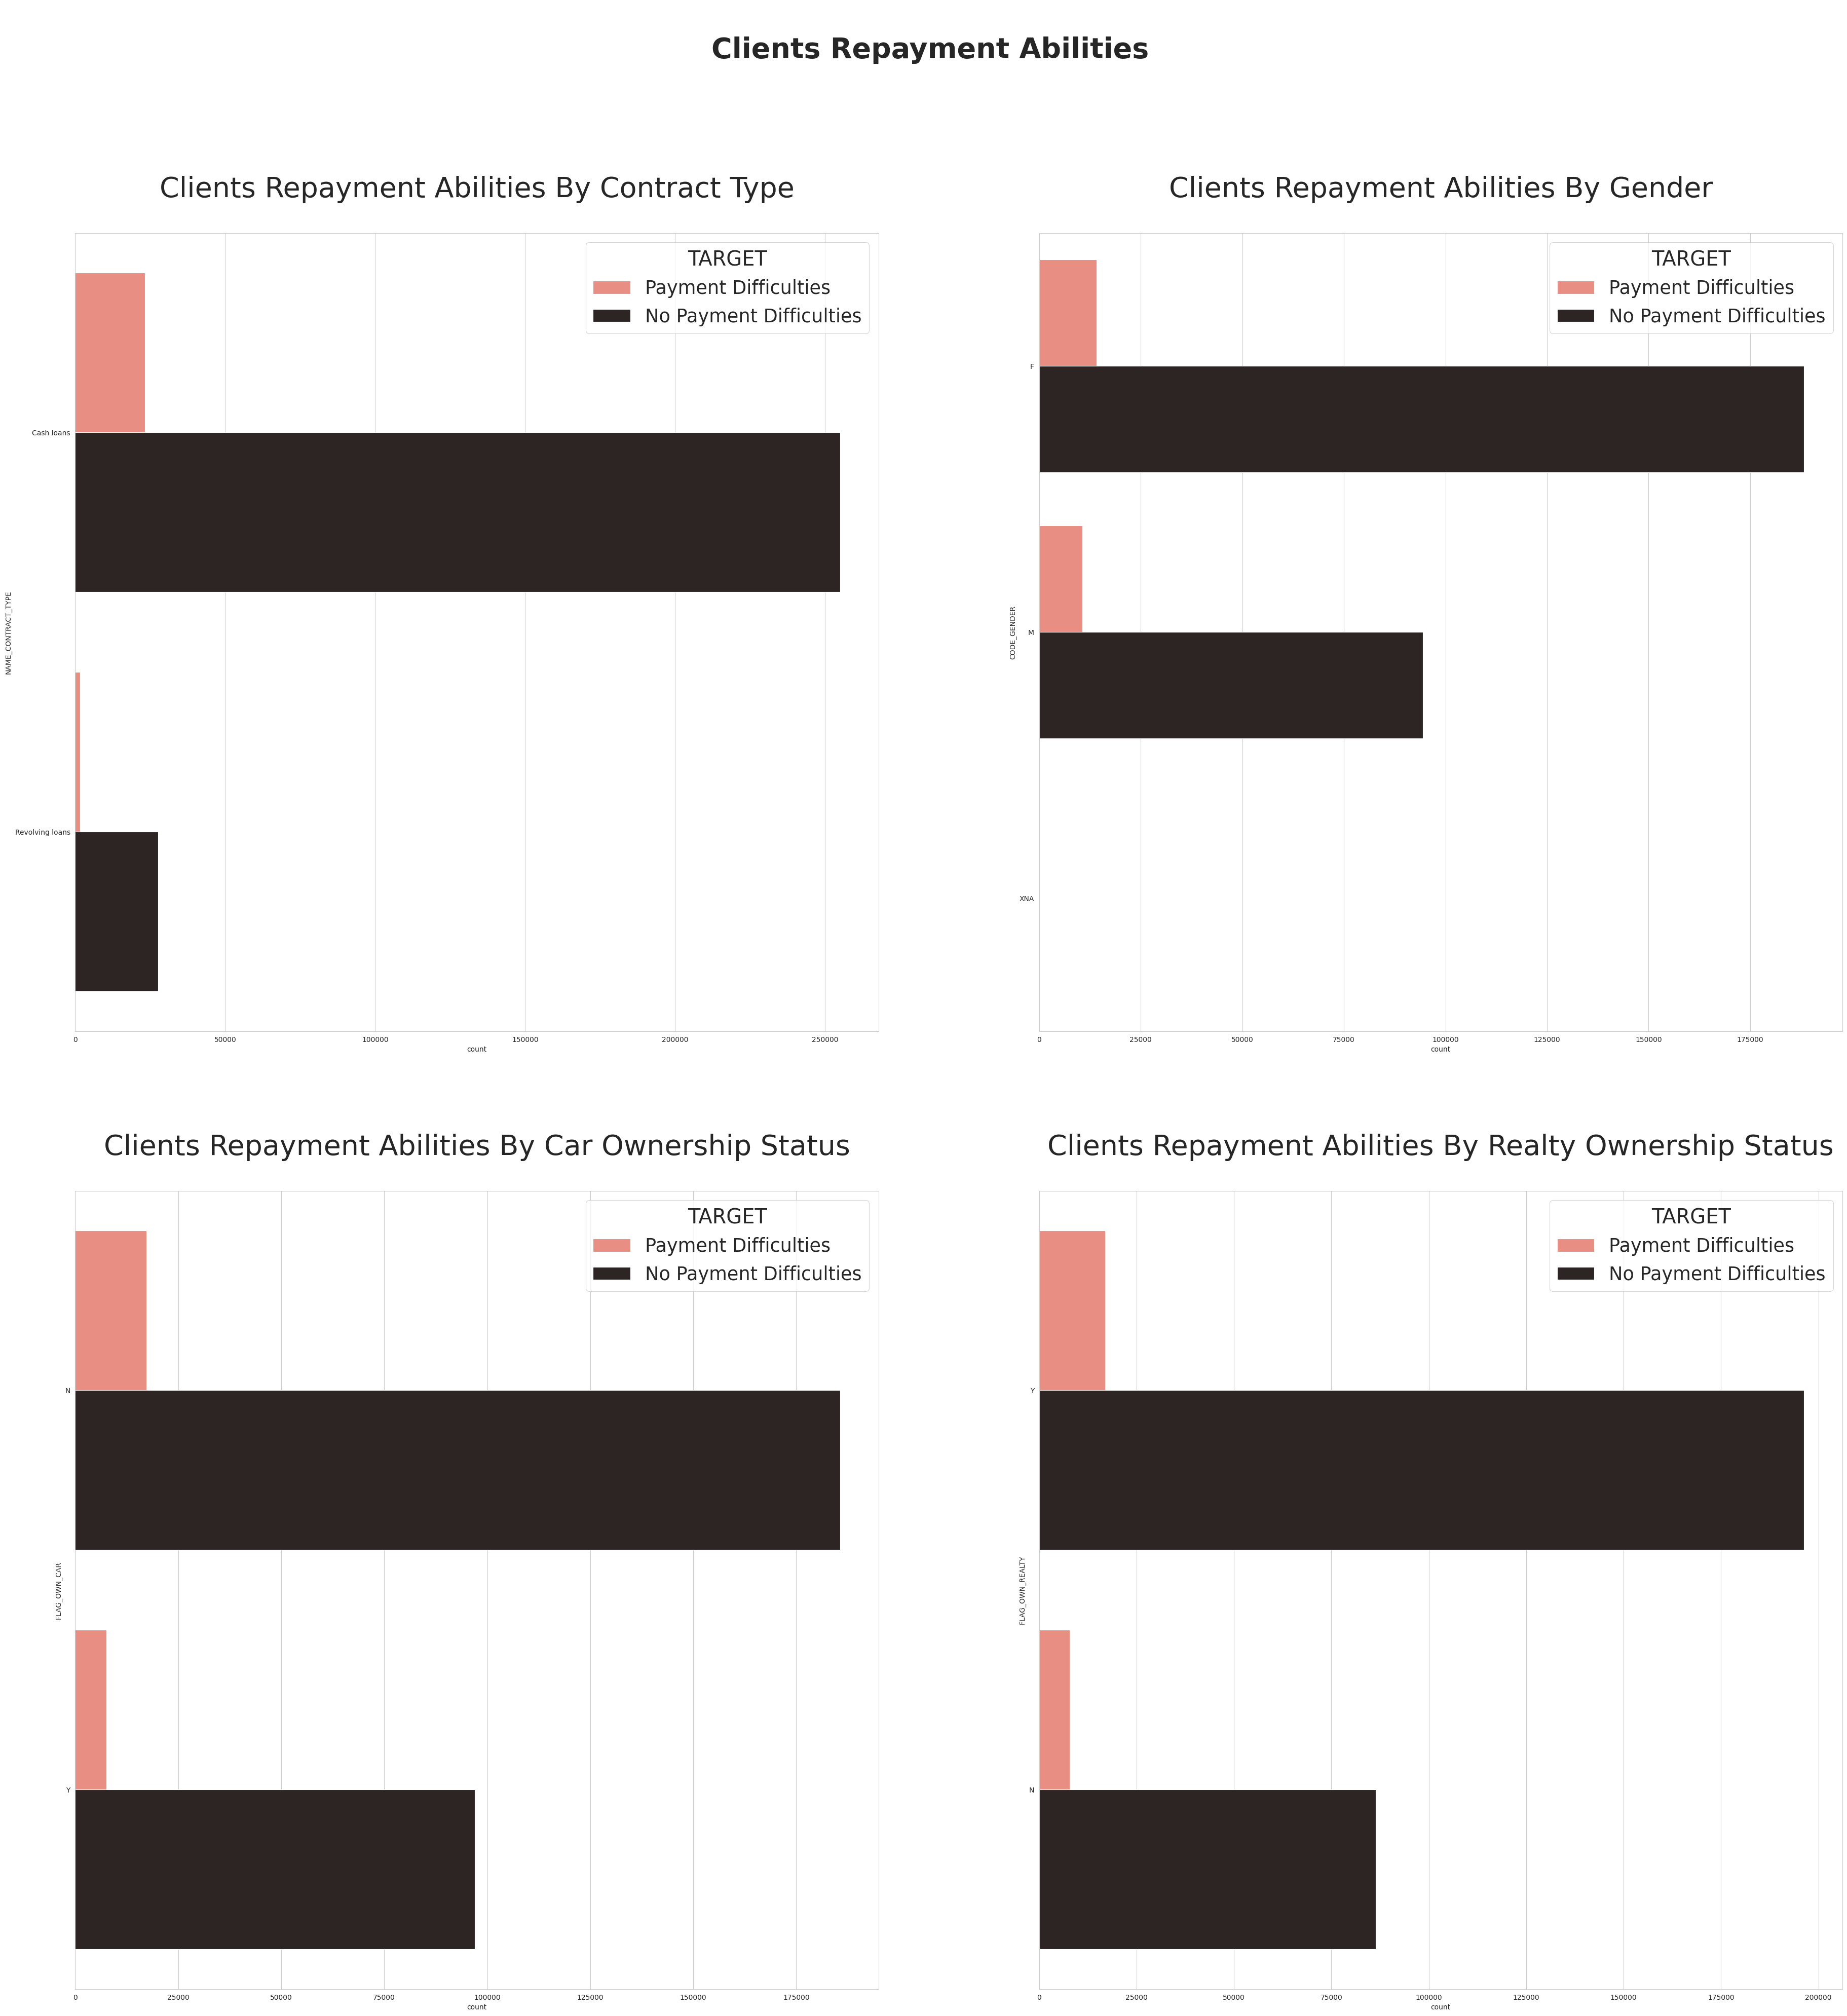

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(45,45))
sns.set_context('paper', font_scale=3)
fig.suptitle('\nClients Repayment Abilities',fontweight='bold', fontsize=40)
ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontsize=40)
sns.countplot(y='NAME_CONTRACT_TYPE', data = df, hue = 'TARGET', order=df['NAME_CONTRACT_TYPE'].value_counts().index, palette="dark:salmon_r", ax=ax[0][0])
ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontsize=40)
sns.countplot(y='CODE_GENDER', data = df, hue = 'TARGET',  order=df['CODE_GENDER'].value_counts().index, palette="dark:salmon_r", ax=ax[0][1])
ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontsize=40)
sns.countplot(y='FLAG_OWN_CAR', data = df, hue = 'TARGET', order=df['FLAG_OWN_CAR'].value_counts().index, palette="dark:salmon_r", ax=ax[1][0])
ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontsize=40)
sns.countplot(y='FLAG_OWN_REALTY', data = df, hue = 'TARGET',  order=df['FLAG_OWN_REALTY'].value_counts().index, palette="dark:salmon_r", ax=ax[1][1])

DESKRIPSI
<li> CONTRACT TYPE: tipe kontrak peminjaman
<li> GENDER: jenis kelamin klien
<li> OWN CAR: status kepemilikan mobil
<li> OWN REALTY: status kepemilikan aset berharga

INTERPRETASI
<li> lebih banyak klien yang mengajukan peminjaman tunai daripada peminjaman kredit (revolving loans).
<li> kebanyakan klien berjenis kelamin wanita.
<li> klien yang punya aset berharga cenderung lebih banyak mengajukan pinjaman.
<li> klien yang tidak punya mobil lebih banyak yang melakukan pinjaman.

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(100,75))
sns.set_context('notebook', font_scale=4)
fig.suptitle('\nClients Repayment Abilities',fontweight='bold', fontsize=60)
ax[0][0].set_title('Clients Repayment Abilities By Education Type', fontsize=50)
sns.countplot(y='NAME_EDUCATION_TYPE', data = df, hue = 'TARGET', order=df['NAME_EDUCATION_TYPE'].value_counts().index, palette="dark:salmon_r", ax=ax[0][0])
ax[0][1].set_title('Clients Repayment Abilities By Family Status', fontsize=50)
sns.countplot(y='NAME_FAMILY_STATUS', data = df, hue = 'TARGET', order=df['NAME_FAMILY_STATUS'].value_counts().index, palette="dark:salmon_r",ax=ax[0][1])
ax[1][0].set_title('Clients Repayment Abilities By Suite Type', fontsize=50)
sns.countplot(y='NAME_TYPE_SUITE', data = df, hue = 'TARGET', order=df['NAME_TYPE_SUITE'].value_counts().index, palette="dark:salmon_r", ax=ax[1][0])
ax[1][1].set_title('Clients Repayment Abilities By Income Type', fontsize=50)
sns.countplot(y='NAME_INCOME_TYPE', data = df, hue = 'TARGET', order=df['NAME_INCOME_TYPE'].value_counts().index, palette="dark:salmon_r", ax=ax[1][1])

<Axes: title={'center': 'Clients Repayment Abilities By Income Type'}, xlabel='count', ylabel='NAME_INCOME_TYPE'>

DESKRIPSI
<li> EDUCATION TYPE: jenjang edukasi klien
<li> FAMILY STATUS: status perkawinan
<li> TYPE SUITE: pendamping klien saat mengajukan peminjaman sebelumnya
<li> INCOME TYPE: jenis pendapatan klien

INTERPRETASI
<li> banyak peminjam yang berasal dari jenjang secondary/secondary special (setara SMA), kemudian diikuti oleh klien dari jenjang kuliah.
<li> banyak klien dengan status perkawinan married/menikah yang mengajukan peminjaman dan tidak kesulitan dalam pelunasan.
<li> kebanyakan klien mengajukan peminjaman tanpa ditemani orang lain.
<li> kebanyakan klien yang mengajukan peminjaman sedang dalam kondisi bekerja.

<Axes: title={'center': '\nClients Repayment Abilities By HOUSETYPE_MODE\n'}, xlabel='count', ylabel='HOUSETYPE_MODE'>

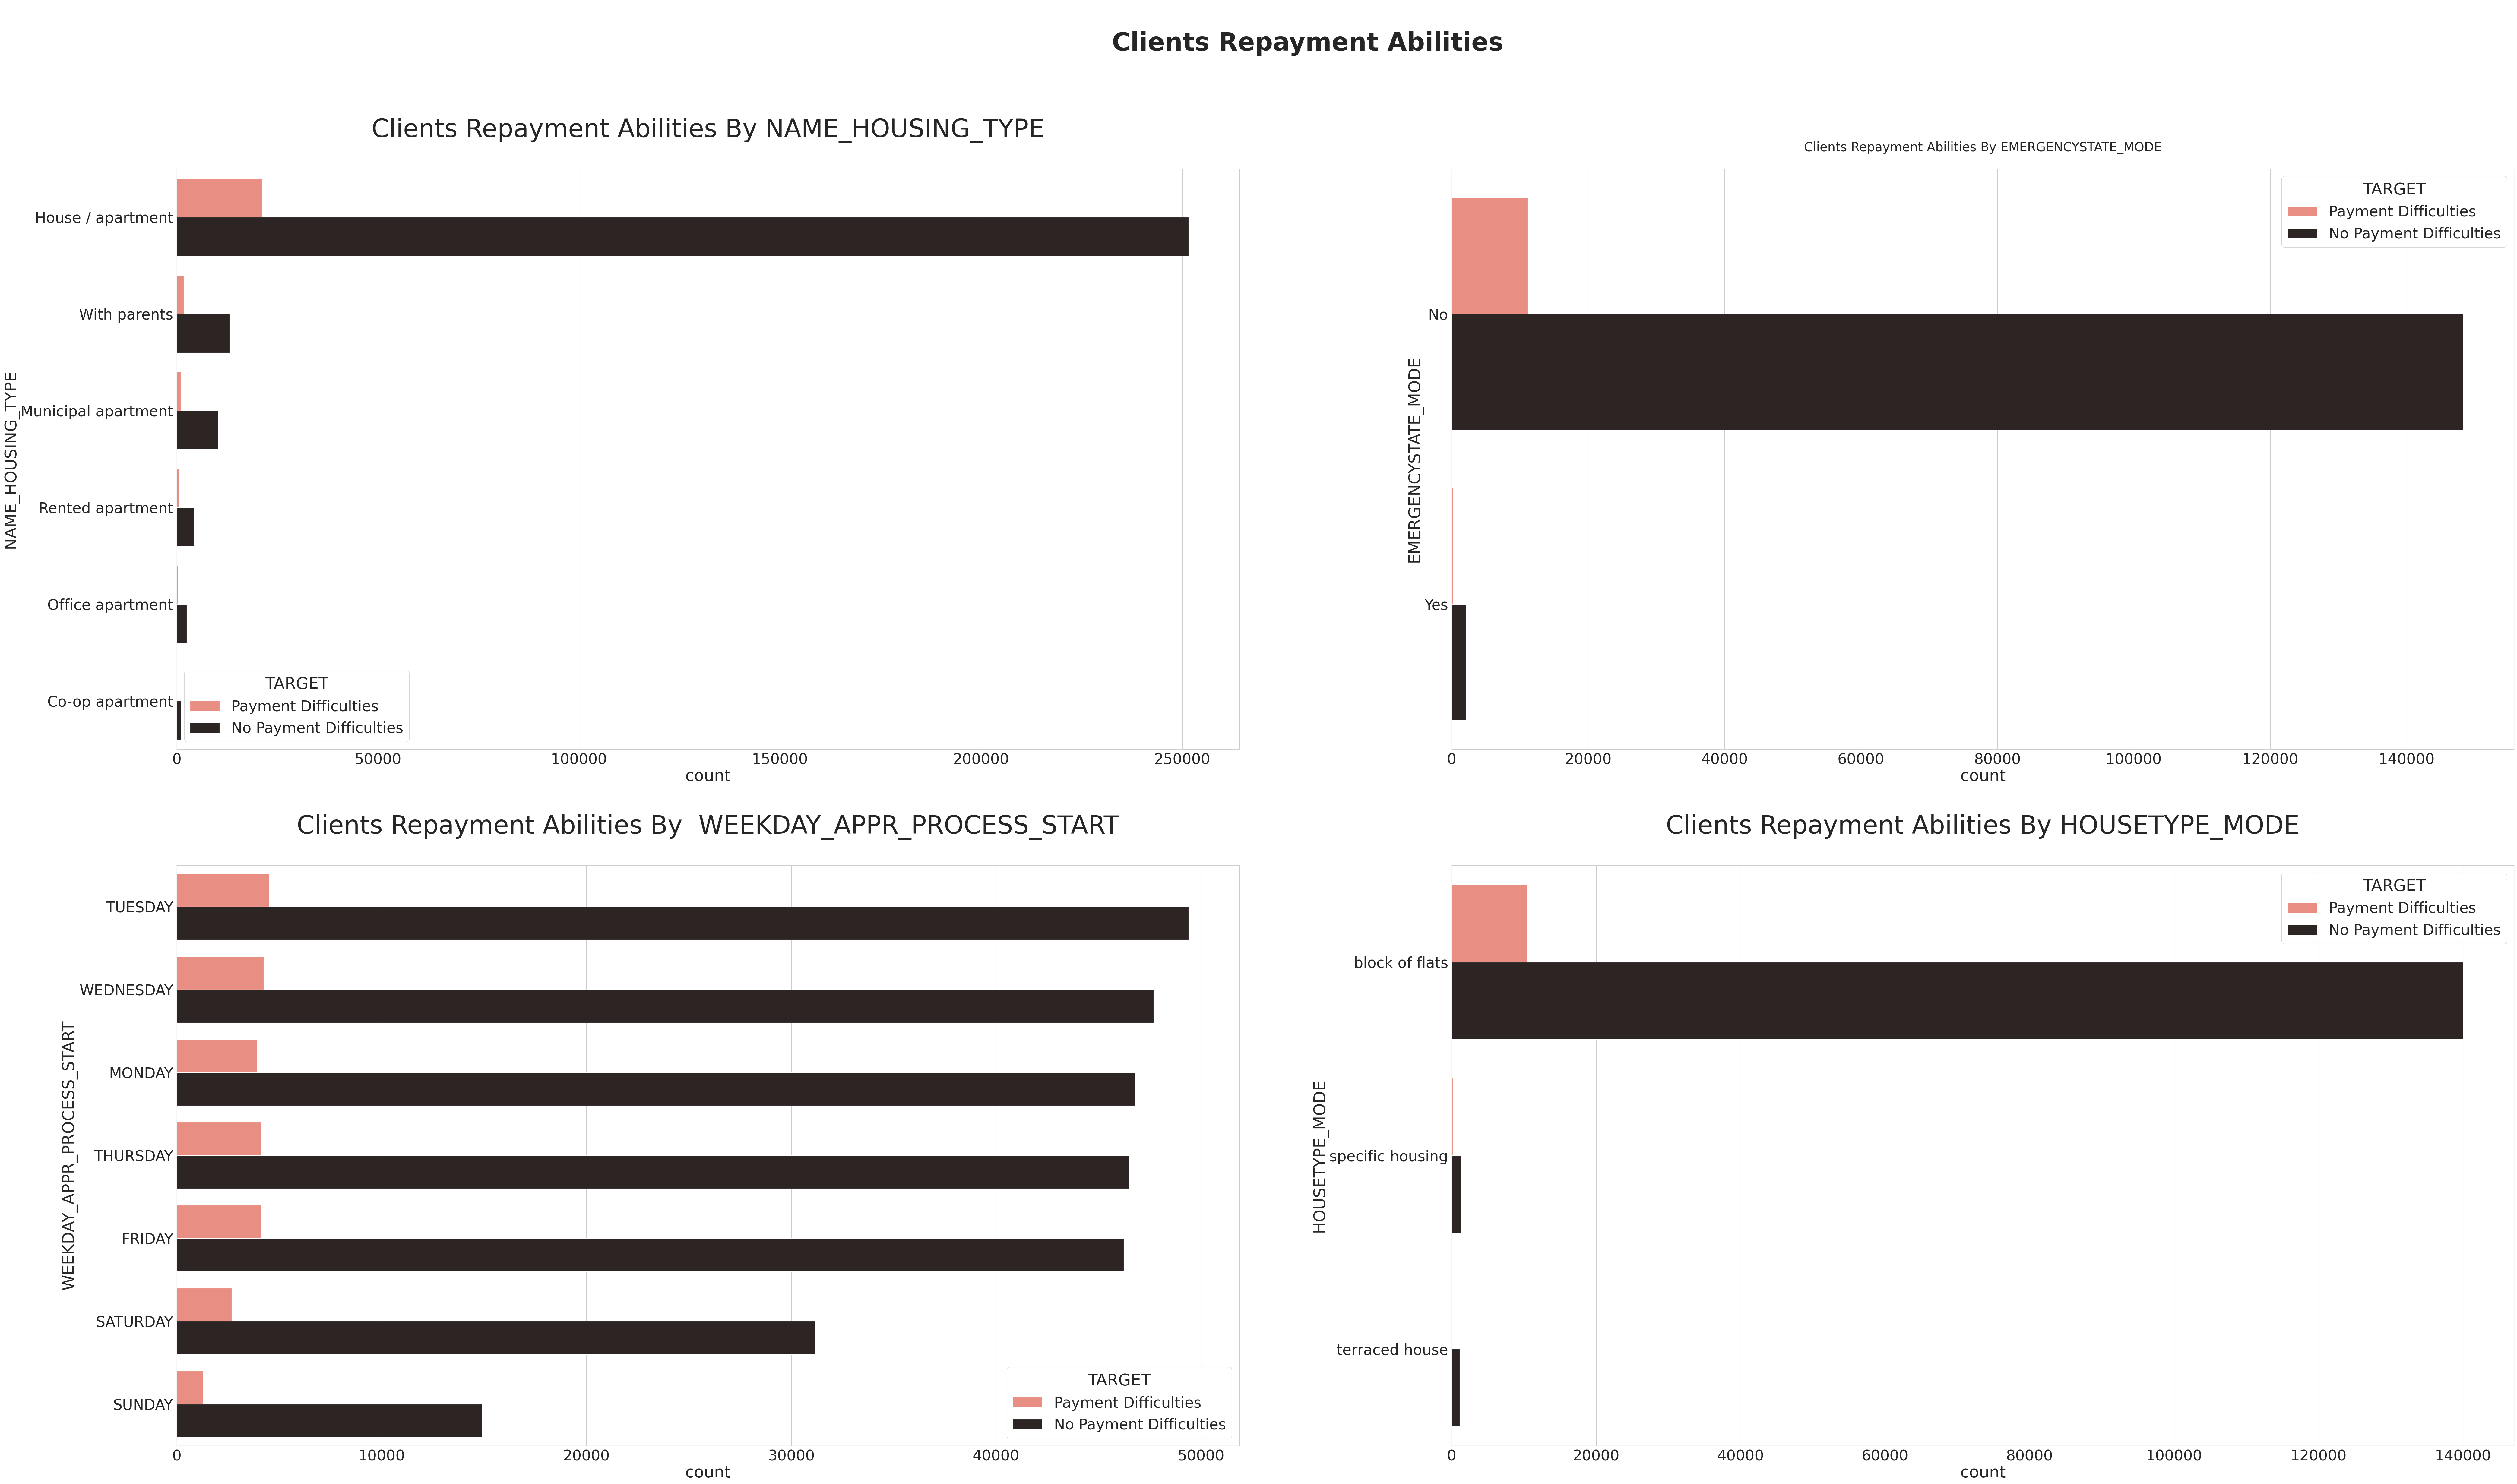

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(100,55))
sns.set_context('paper', font_scale=4)
fig.suptitle('\nClients Repayment Abilities',fontweight='bold', fontsize=60)
ax[0][0].set_title('Clients Repayment Abilities By NAME_HOUSING_TYPE\n', fontsize=60)
sns.countplot(y='NAME_HOUSING_TYPE', data = df, hue = 'TARGET', order=df['NAME_HOUSING_TYPE'].value_counts().index, palette="dark:salmon_r", ax=ax[0][0])
ax[0][1].set_title('Clients Repayment Abilities By EMERGENCYSTATE_MODE\n', fontsize=30)
sns.countplot(y='EMERGENCYSTATE_MODE', data=df, hue='TARGET', order=df['EMERGENCYSTATE_MODE'].value_counts().index, palette="dark:salmon_r" ,ax=ax[0][1])
ax[1][0].set_title('\nClients Repayment Abilities By  WEEKDAY_APPR_PROCESS_START\n', fontsize=60)
sns.countplot(y='WEEKDAY_APPR_PROCESS_START', data = df, hue = 'TARGET', order=df['WEEKDAY_APPR_PROCESS_START'].value_counts().index, palette="dark:salmon_r", ax=ax[1][0])
ax[1][1].set_title('\nClients Repayment Abilities By HOUSETYPE_MODE\n', fontsize=60)
sns.countplot(y='HOUSETYPE_MODE', data = df, hue = 'TARGET',  order=df['HOUSETYPE_MODE'].value_counts().index, palette="dark:salmon_r", ax=ax[1][1])

DESKRIPSI
<li> HOUSING TYPE: jenis tempat tinggal
<li> EMERGENCYSTATE MODE: jenis kedaruratan peminjaman
<li> WEEKDAY APPR PROCESS START: hari pengajuan peminjaman oleh klien
<li> HOUSETYPE MODE: tipe rumah

INTERPRETASI
<li> klien yang meminjam kebanyakan bertempat tinggal di rumah/apartemen.
<li> klien yang memohon pinjaman untuk kondisi darurat lebih sedikit dari kondisi non-darurat.
<li> kebanyakan dari klien memiliki tipe rumah block of flats (Gedung besar dengan kamar-kamar).
<li> pengajuan peminjaman paling banyak dilakukan di hari Selasa.

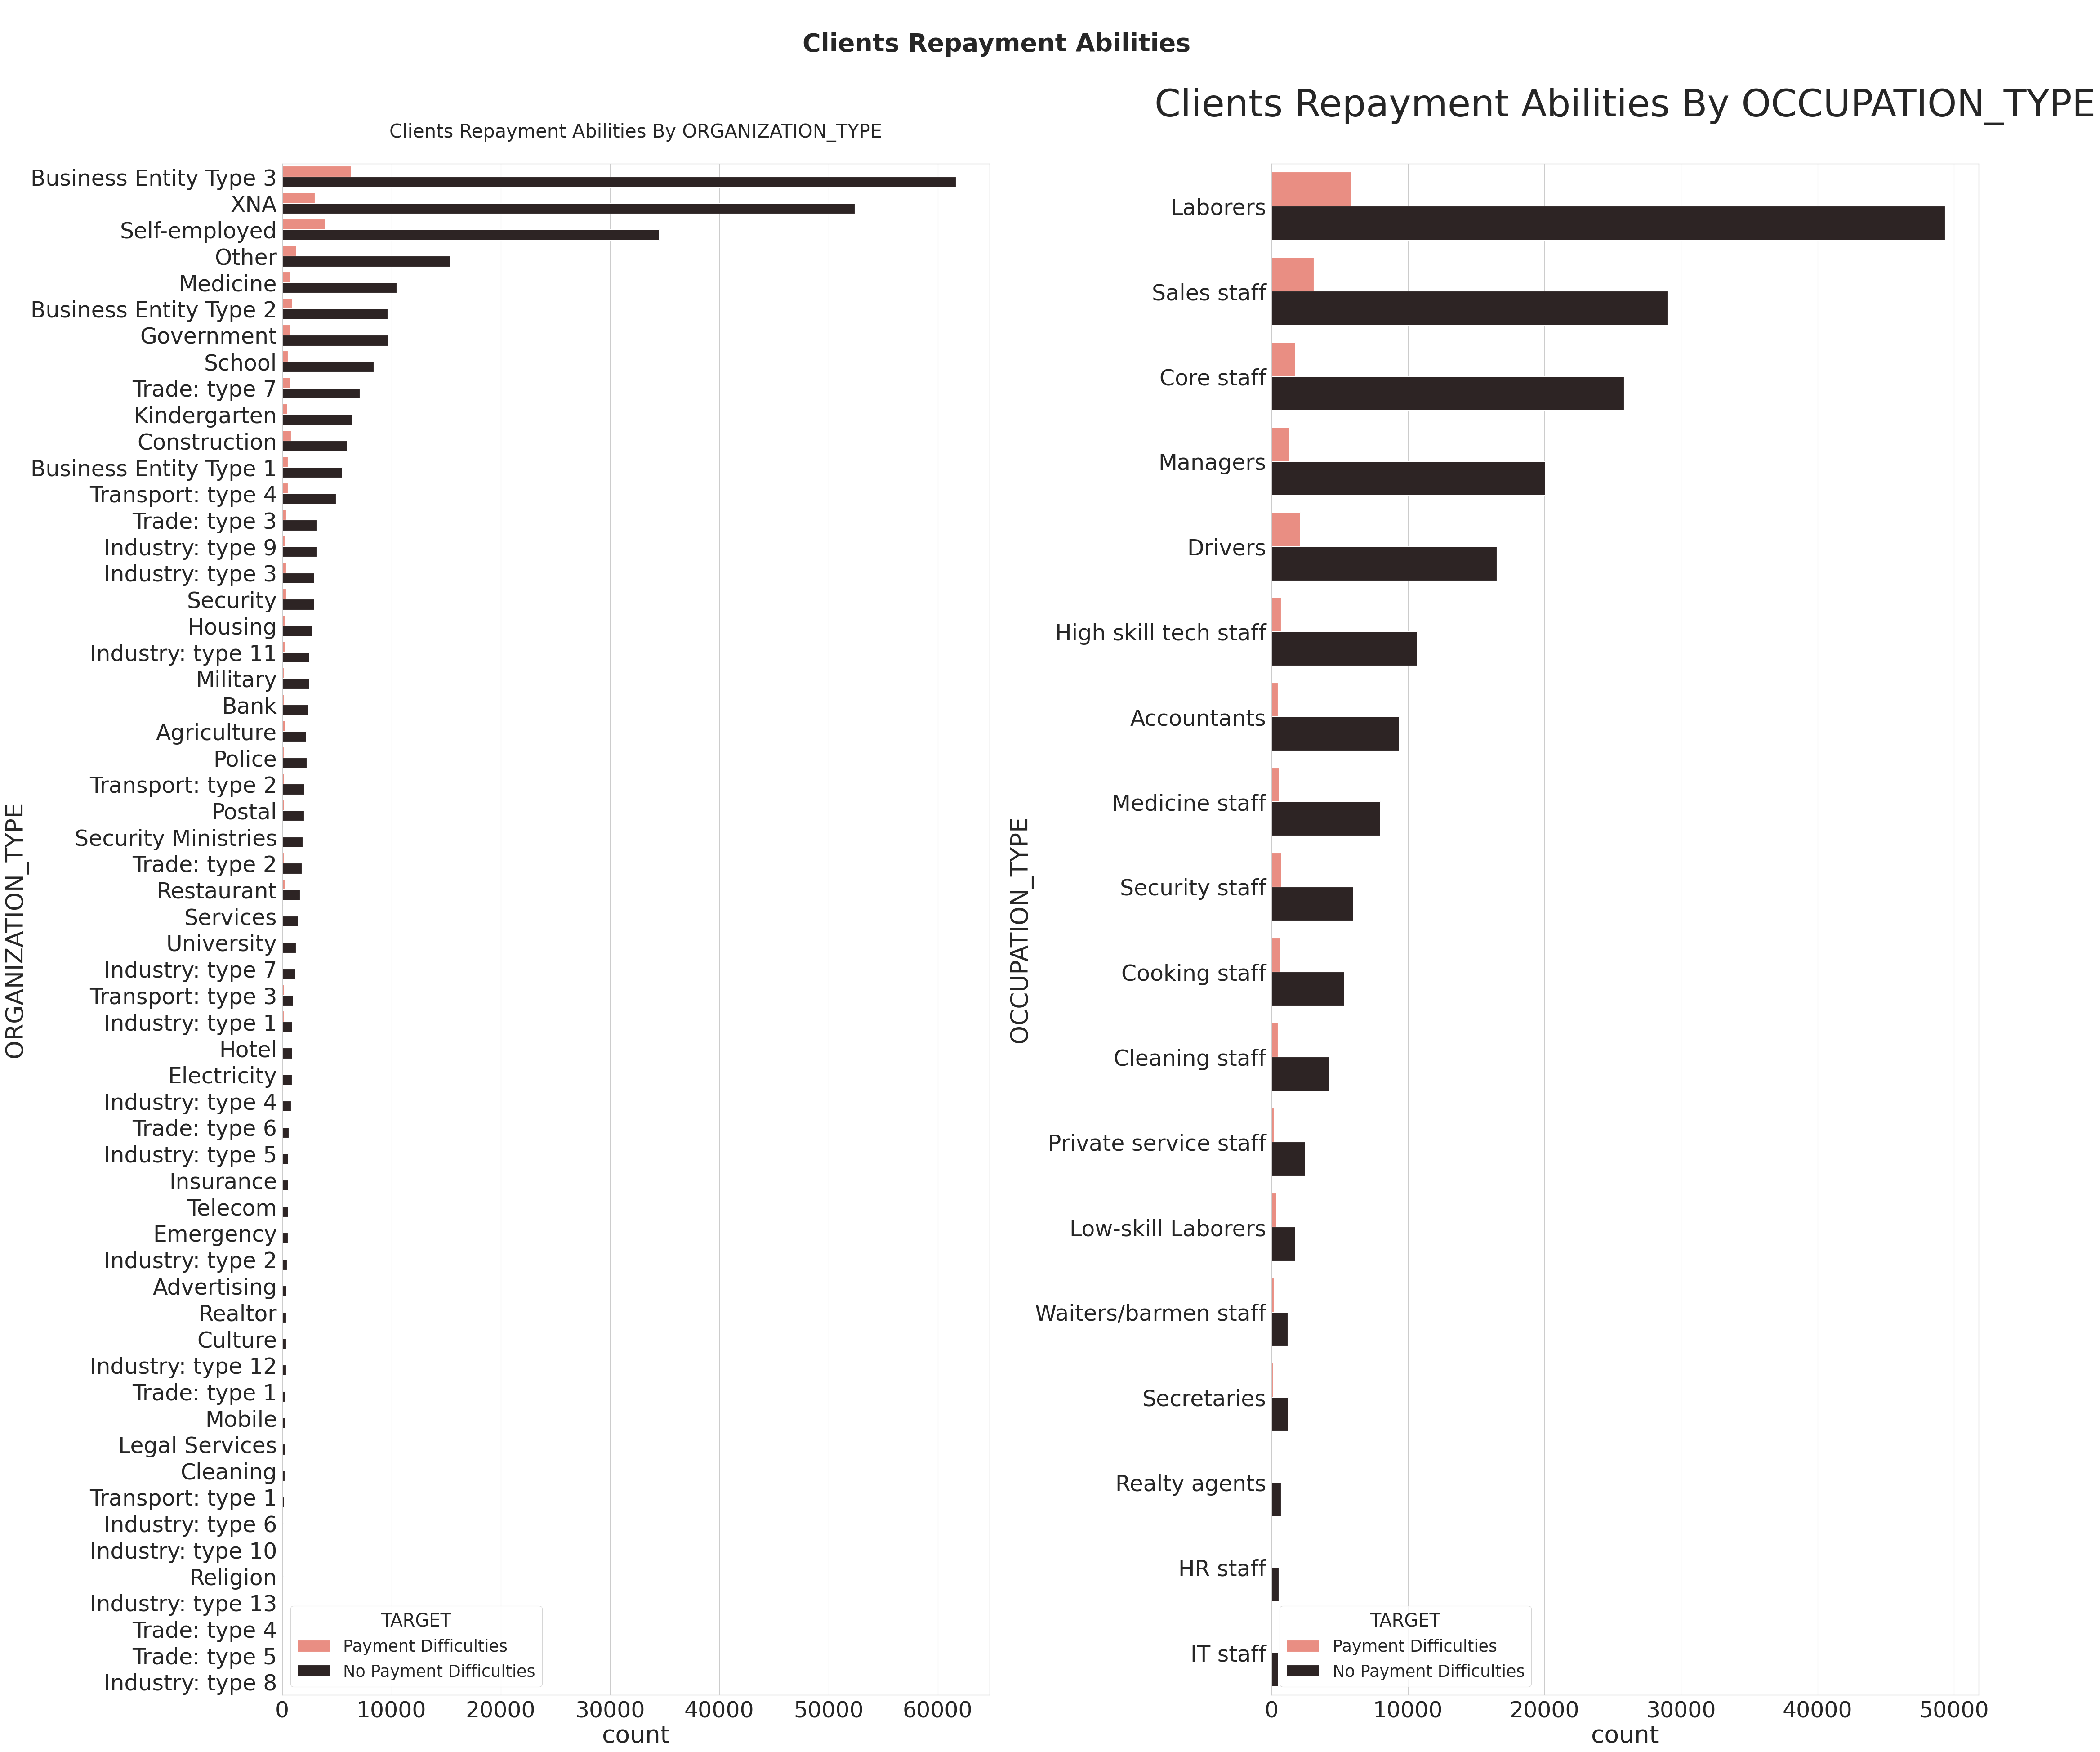

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(45, 40))
sns.set_context('paper', font_scale=3)
fig.suptitle('\nClients Repayment Abilities\n', fontweight='bold', fontsize=40)
ax[0].set_title('Clients Repayment Abilities By ORGANIZATION_TYPE\n', fontsize=30)
sns.countplot(y='ORGANIZATION_TYPE', data=df, hue='TARGET', order=df['ORGANIZATION_TYPE'].value_counts().index, palette="dark:salmon_r" ,ax=ax[0])
ax[1].set_title('Clients Repayment Abilities By OCCUPATION_TYPE\n', fontsize=60)
sns.countplot(y='OCCUPATION_TYPE', data = df, hue = 'TARGET',  order=df['OCCUPATION_TYPE'].value_counts().index, palette="dark:salmon_r", ax=ax[1])
plt.tight_layout()
plt.show()

DESKRIPSI

- OCCUPATION TYPE : Jenis pekerjaan apa yang dimiliki oleh klien

- ORGANIZATION TYPE : Jenis organisasi di mana klien bekerja

INTERPRETASI

- Jumlah klien terbanyak ada pada pada klien dengan tipe organisasi bisnis type 3 seperti corporate dan klien dengan jenis pekerjaan buruh. 

## NUMERICAL FEATURES

In [ ]:
df_num = desc_df[(desc_df['data_type'] != 'category') & (desc_df['data_type'] != 'object')]
col_num = df_num['feature'].to_list()
df_num

feature data_type  null_num   null_pct  unique_num  \
0                      SK_ID_CURR     int32         0   0.000000      307511   
6                    CNT_CHILDREN      int8         0   0.000000          15   
7                AMT_INCOME_TOTAL   float32         0   0.000000        2548   
8                      AMT_CREDIT   float32         0   0.000000        5603   
9                     AMT_ANNUITY   float32        12   0.003902       13672   
10                AMT_GOODS_PRICE   float32       278   0.090403        1002   
16     REGION_POPULATION_RELATIVE   float16         0   0.000000          81   
17                     DAYS_BIRTH     int16         0   0.000000       17460   
18                  DAYS_EMPLOYED     int32         0   0.000000       12574   
19              DAYS_REGISTRATION   float16         0   0.000000        5282   
20                DAYS_ID_PUBLISH     int16         0   0.000000        6168   
21                    OWN_CAR_AGE   float16    202929  65.990810          62   
22                     FLAG_MOBIL      int8         0   0.000000           2   
23                 FLAG_EMP_PHONE      int8         0   0.000000           2   
24                FLAG_WORK_PHONE      int8         0   0.000000           2   
25               FLAG_CONT_MOBILE      int8         0   0.000000           2   
26                     FLAG_PHONE      int8         0   0.000000           2   
27                     FLAG_EMAIL      int8         0   0.000000           2   
29                CNT_FAM_MEMBERS   float16         2   0.000650          17   
30           REGION_RATING_CLIENT      int8         0   0.000000           3   
31    REGION_RATING_CLIENT_W_CITY      int8         0   0.000000           3   
33        HOUR_APPR_PROCESS_START      int8         0   0.000000          24   
34     REG_REGION_NOT_LIVE_REGION      int8         0   0.000000           2   
35     REG_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
36    LIVE_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
37         REG_CITY_NOT_LIVE_CITY      int8         0   0.000000           2   
38         REG_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
39        LIVE_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
41                   EXT_SOURCE_1   float16    173378  56.381073        4430   
42                   EXT_SOURCE_2   float16       660   0.214626        6888   
43                   EXT_SOURCE_3   float16     60965  19.825307         814   
44                 APARTMENTS_AVG   float16    156061  50.749729        2251   
45               BASEMENTAREA_AVG   float16    179943  58.515956        3127   
46    YEARS_BEGINEXPLUATATION_AVG   float16    150007  48.781019         284   
47                YEARS_BUILD_AVG   float16    204488  66.497784         149   
48                 COMMONAREA_AVG   float16    214865  69.872297        2841   
49                  ELEVATORS_AVG   float16    163891  53.295980         257   
50                  ENTRANCES_AVG   float16    154828  50.348768         285   
51                  FLOORSMAX_AVG   float16    153020  49.760822         403   
52                  FLOORSMIN_AVG   float16    208642  67.848630         304   
53                   LANDAREA_AVG   float16    182590  59.376738        3011   
54           LIVINGAPARTMENTS_AVG   float16    210199  68.354953        1840   
55                 LIVINGAREA_AVG   float16    154350  50.193326        3715   
56        NONLIVINGAPARTMENTS_AVG   float16    213514  69.432963         386   
57              NONLIVINGAREA_AVG   float16    169682  55.179164        2885   
58                APARTMENTS_MODE   float16    156061  50.749729         760   
59              BASEMENTAREA_MODE   float16    179943  58.515956        3148   
60   YEARS_BEGINEXPLUATATION_MODE   float16    150007  48.781019         221   
61               YEARS_BUILD_MODE   float16    204488  66.497784         154   
62                COMMONAR

### NUMERICAL FEATURES VS TARGET

In [ ]:
col_num_plot= ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

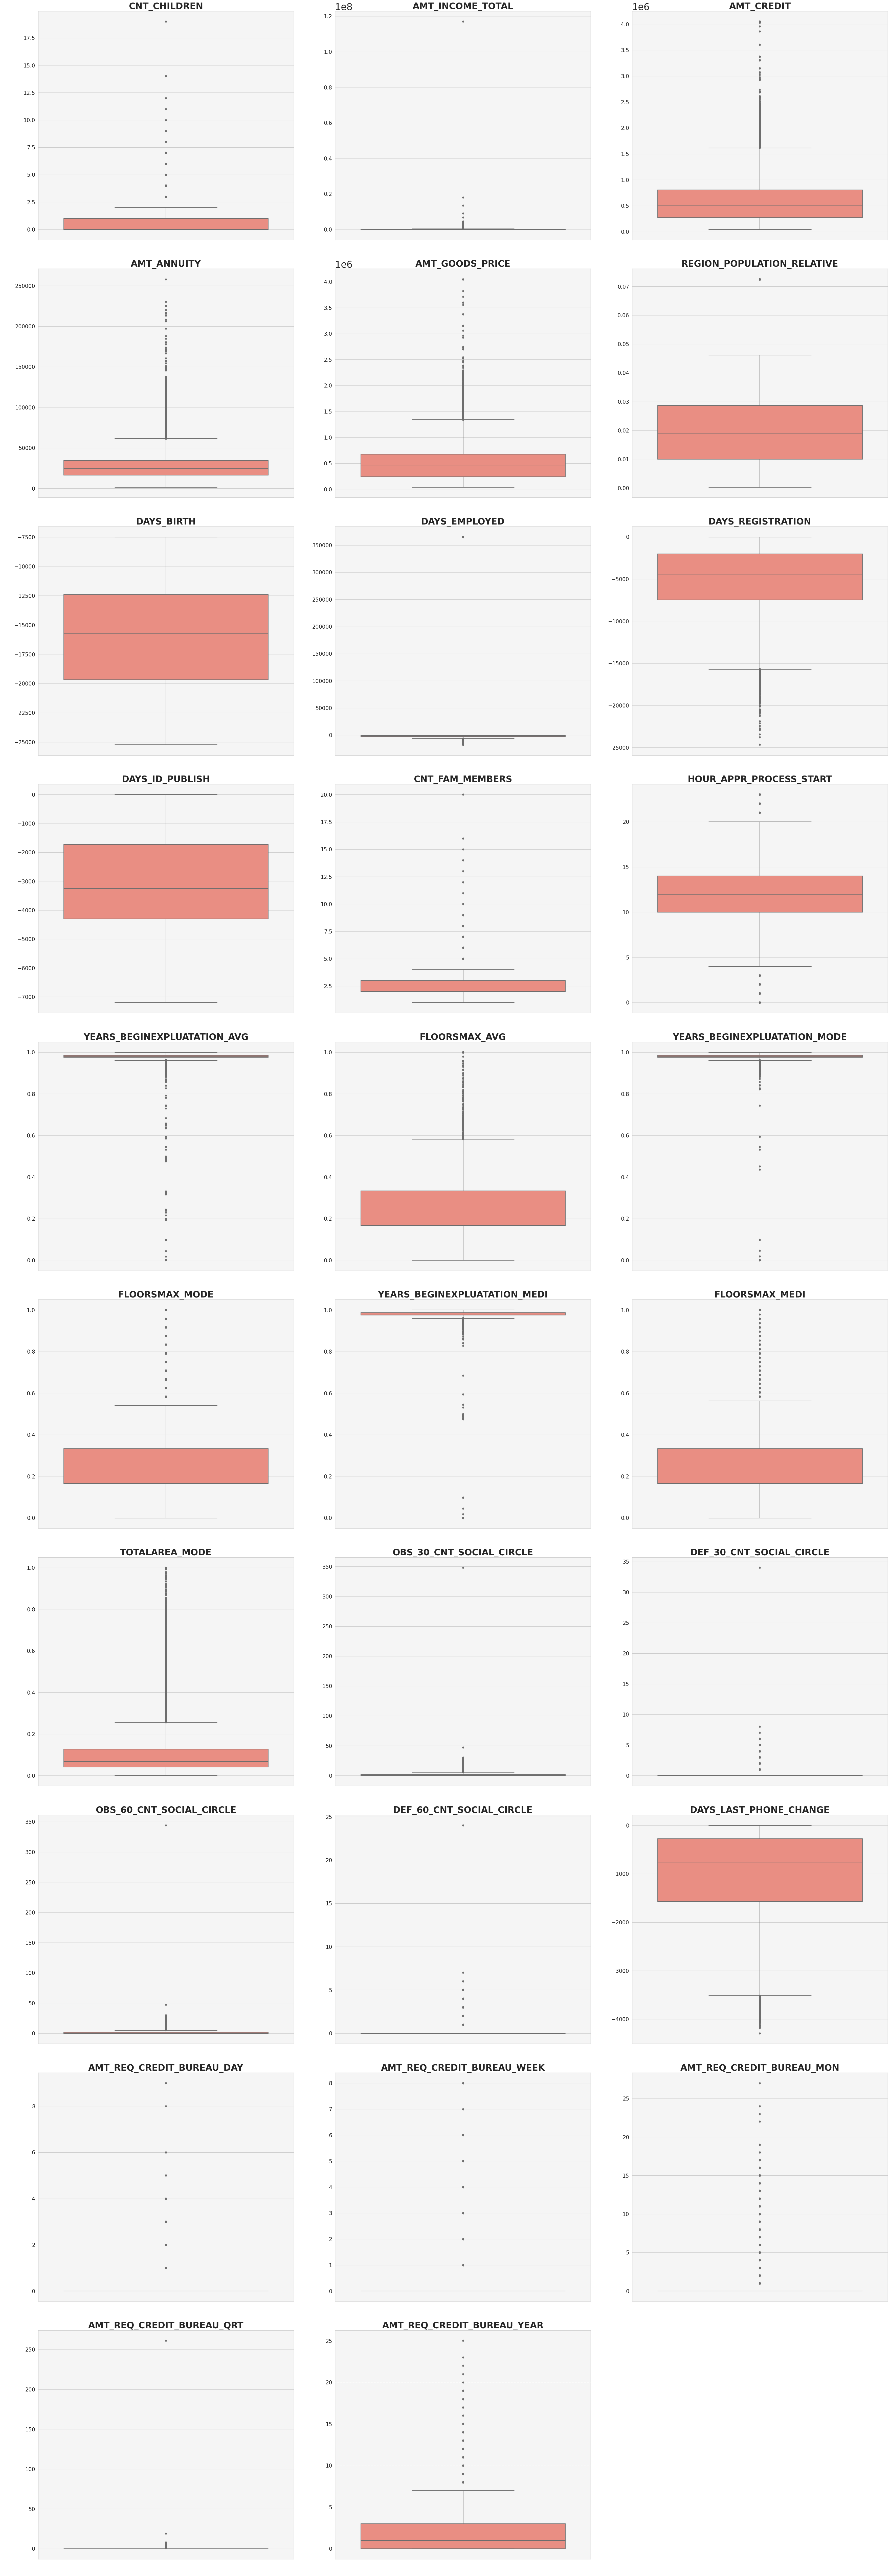

In [ ]:
# Set figure size and background color
plt.figure(figsize=(40,120))
sns.set_style("whitegrid", {'axes.facecolor': 'black'})

# Loop through col_numeric features and create boxplot
for i in range(0,len(col_num_plot)):
    plt.subplot(10,3,i+1)
    ax = sns.boxplot(y=df[col_num_plot[i]], palette="dark:salmon_r", linewidth=2)
    ax.set_facecolor('whitesmoke')
    plt.title(col_num_plot[i], fontsize=25, fontweight='bold')
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()

# Add gridlines
plt.grid(True, linestyle='--', color='white', alpha=0.5)


# Adjust plot borders and save figure
plt.subplots_adjust(left=0.08, right=0.92, top=0.92, bottom=0.08)

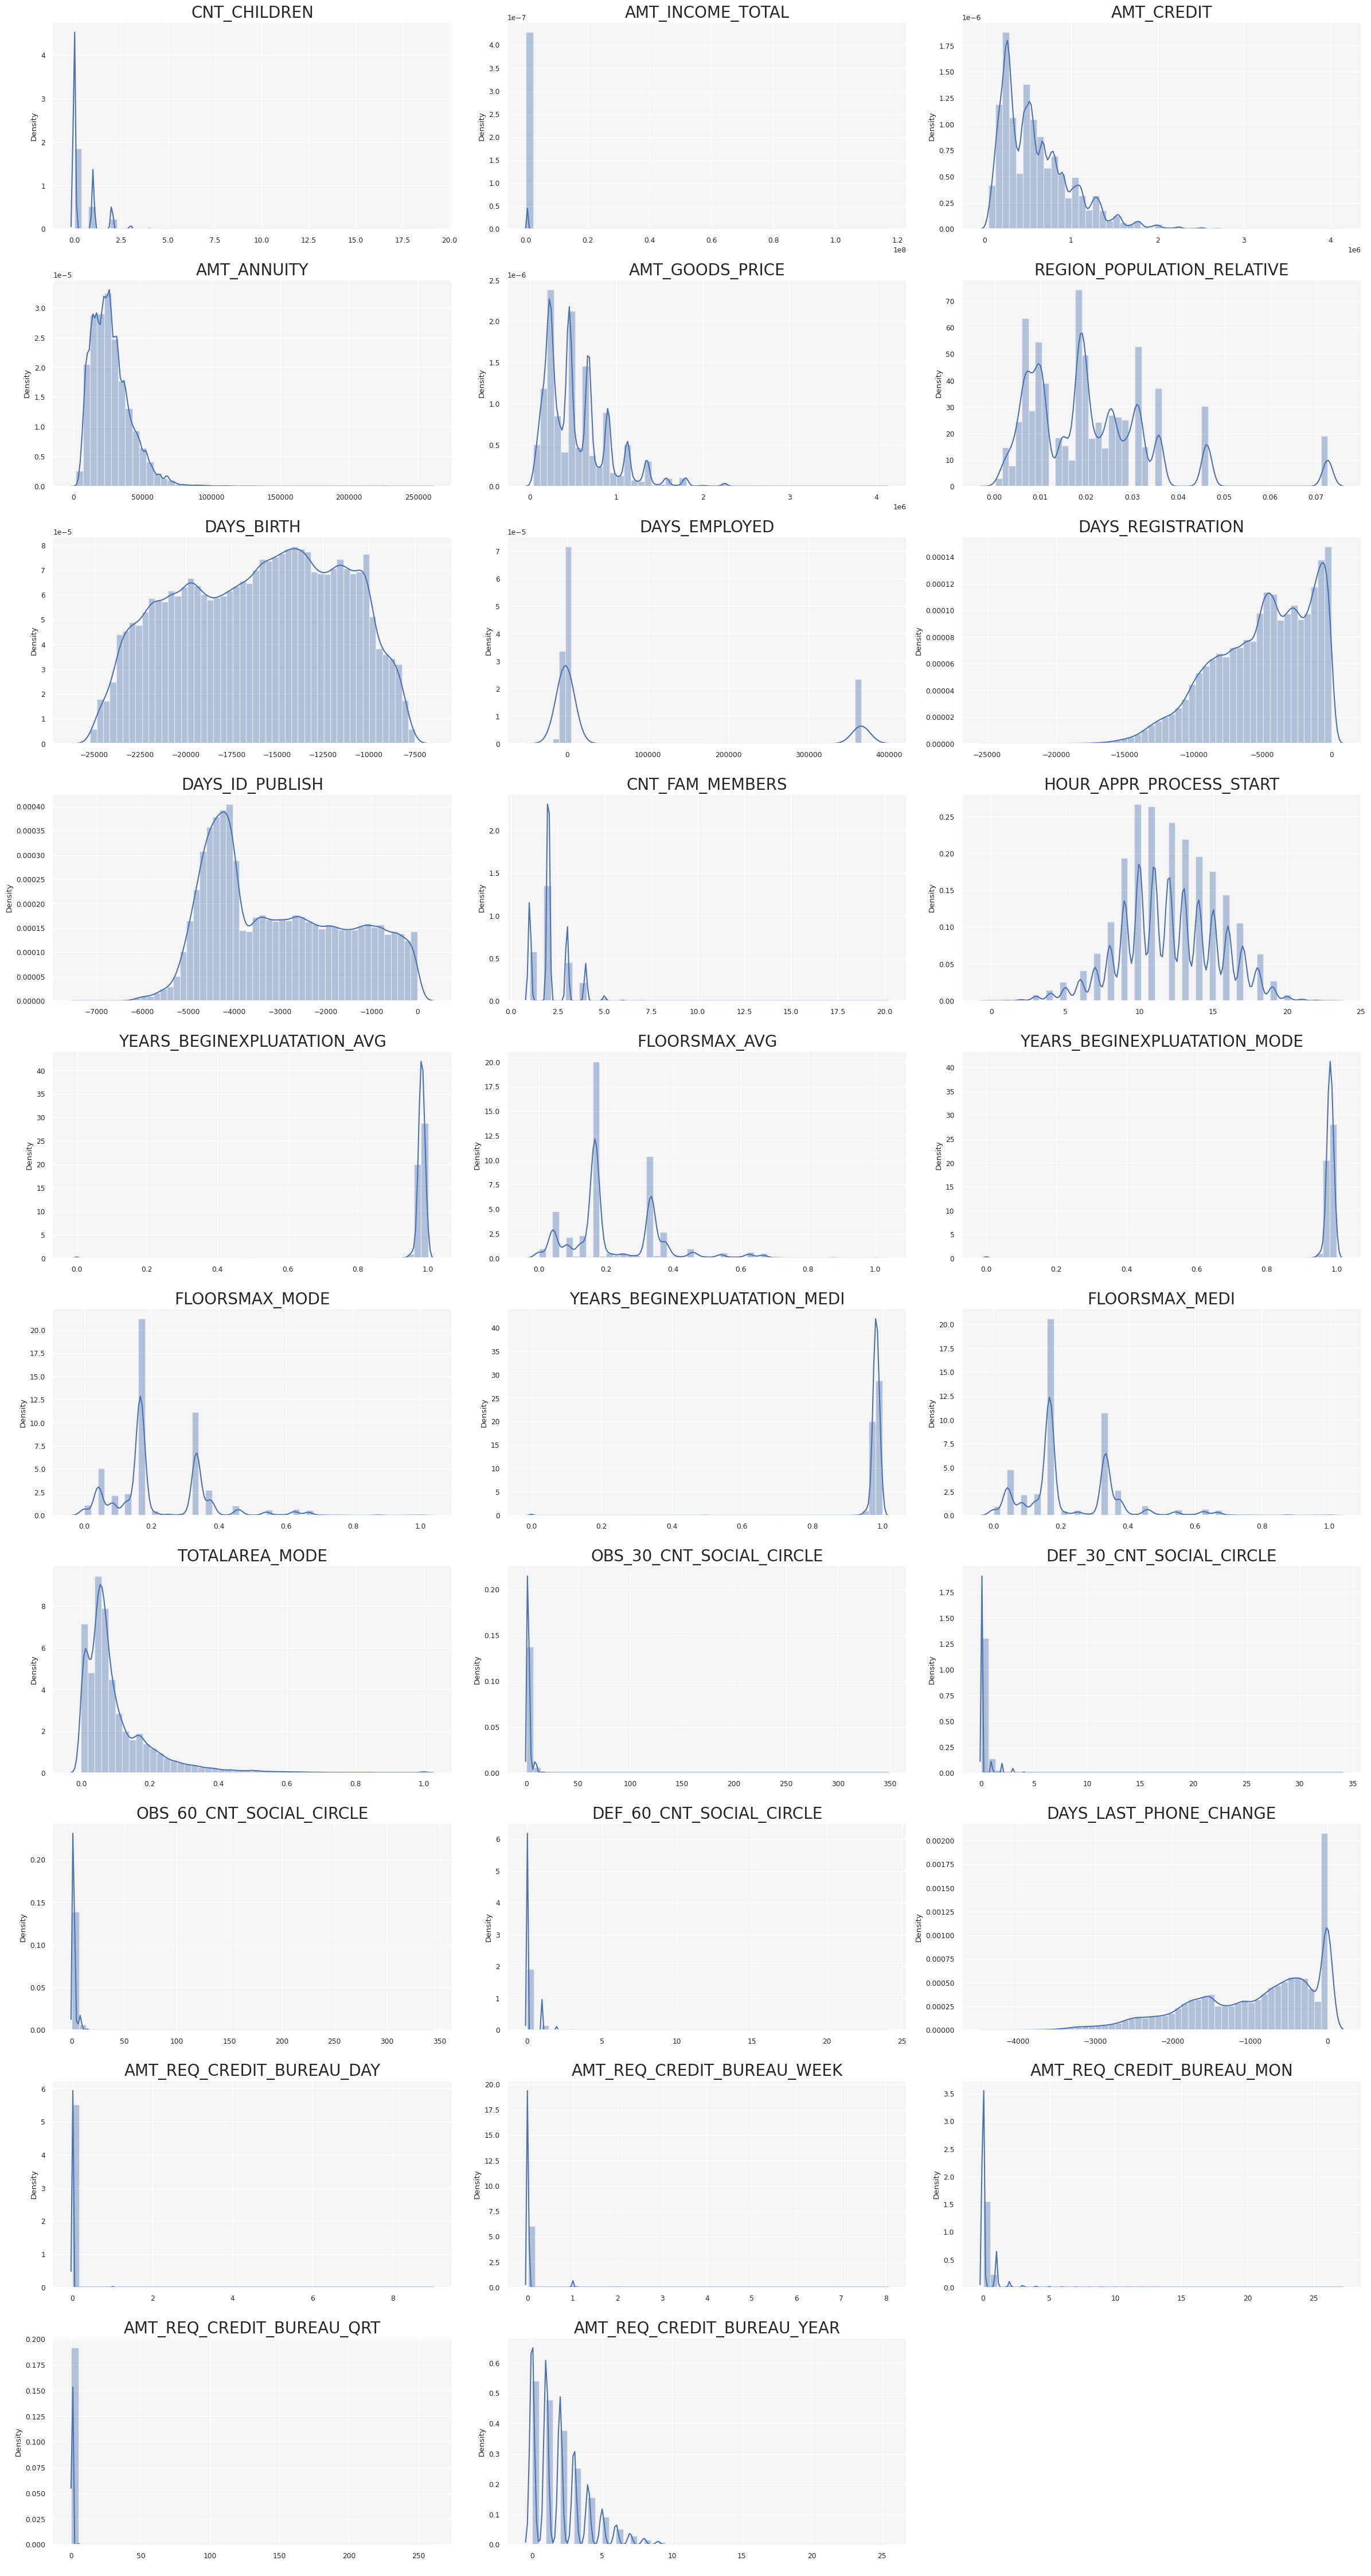

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(24,45))
for i in range(0,len(col_num_plot)):
    plt.subplot(10,3,i+1)
    ax = sns.distplot(x=df[col_num_plot[i]])
    ax.set_facecolor('whitesmoke')
    plt.title(col_num_plot[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()


## MULTIVARIATE ANALYSIS

### Income Type and Income Total by Car Ownership and Target

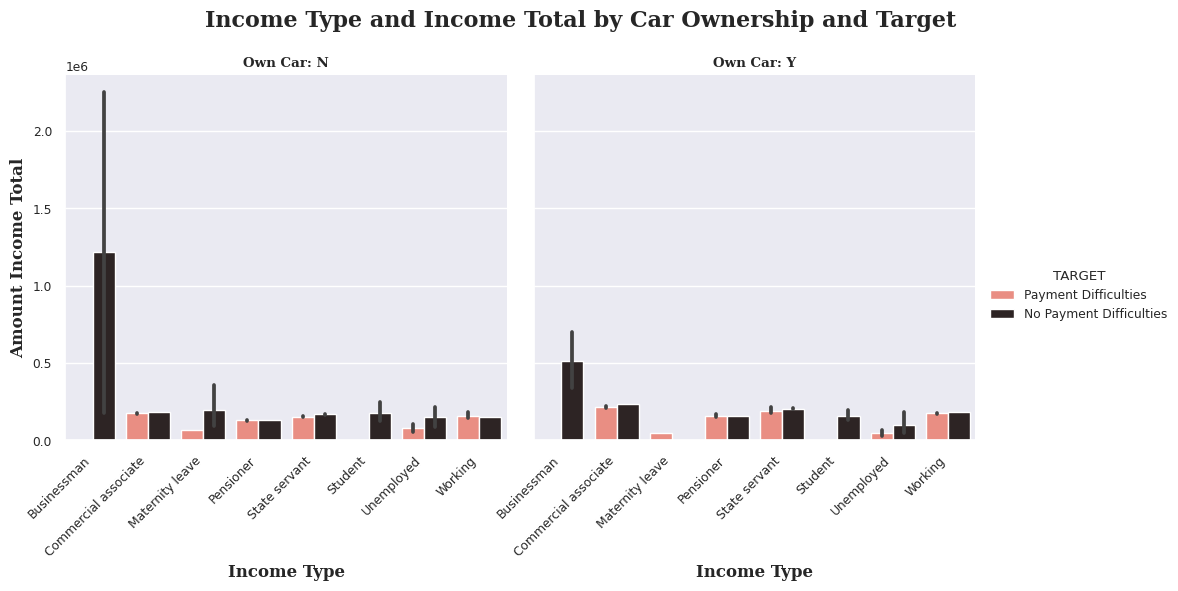

In [ ]:
sns.set(font_scale=0.8)
fig = sns.catplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', 
                  col='FLAG_OWN_CAR', kind='bar', 
                  palette='dark:salmon_r', data=df)
fig.set_xlabels('Income Type', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_xticklabels(rotation=45, horizontalalignment='right')
fig.set_ylabels('Amount Income Total', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_titles(col_template='Own Car: {col_name}', 
               fontsize=14, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(top=0.85)
plt.suptitle('Income Type and Income Total by Car Ownership and Target', 
             fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

DESKRIPSI VARIABEL

-  OWN CAR : Klien yang memiliki mobil

- INCOME TYPE : Jenis Pendapatan Klien

- Amount Income Total :Total Income dari Klien


INTERPRETASI 
- Jenis pendapatan businessman yang tidak memiliki mobil dan tidak memiliki kesulitan untuk membayar cenderung lebih banyak daripada businessman yang memiliki mobil. 

- Jenis pendapatan maternity leave/cuti melahirkan yang memiliki mobil memiliki kemampuan membayar lebih tinggi daripada yang memiliki mobil

- Dapat disimpulkan juga lebih banyak klien yang tidak memiliki mobil daripada yang memiliki mobil

### Income Type and Income Total by Realty Ownership and Target

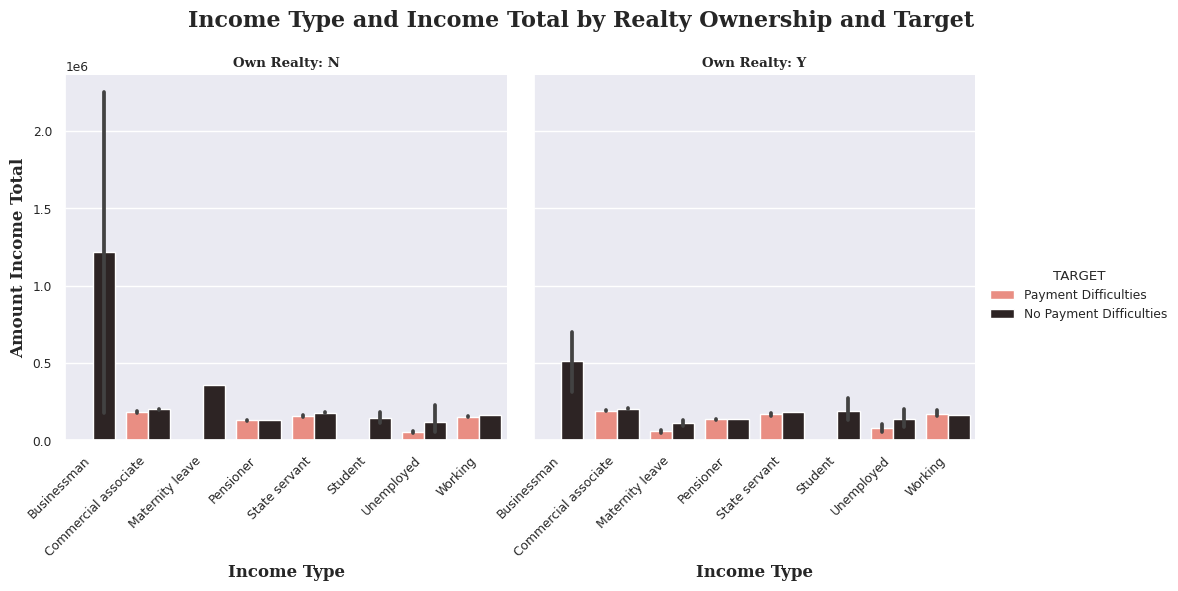

In [ ]:
sns.set(font_scale=0.8)
fig = sns.catplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', 
                  col='FLAG_OWN_REALTY', kind='bar', 
                  palette='dark:salmon_r', data=df)
fig.set_xlabels('Income Type', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_xticklabels(rotation=45, horizontalalignment='right')
fig.set_ylabels('Amount Income Total', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_titles(col_template='Own Realty: {col_name}', 
               fontsize=14, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(top=0.85)
plt.suptitle('Income Type and Income Total by Realty Ownership and Target', 
             fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

DESKRIPSI VARIABEL

-  OWN REALTY : Klien yang memiliki rumah

- INCOME TYPE : Jenis Pendapatan Klien

- Amount Income Total :Total Income dari Klien


INTERPRETASI :  
- Jenis pendapatan businessman yang tidak memiliki rumah dan tidak memiliki kesulitan untuk membayar cenderung lebih banyak daripada businessman yang memiliki rumah. 

- Jenis pendapatan maternity leave/cuti melahirkan yang memiliki rumah memiliki kemampuan membayar lebih tinggi daripada yang memiliki rumah

- Dapat disimpulkan juga lebih banyak klien yang tidak memiliki rumah daripada yang memiliki rumah

### Number of Children and Car Ownership by Real Estate Ownership and Target

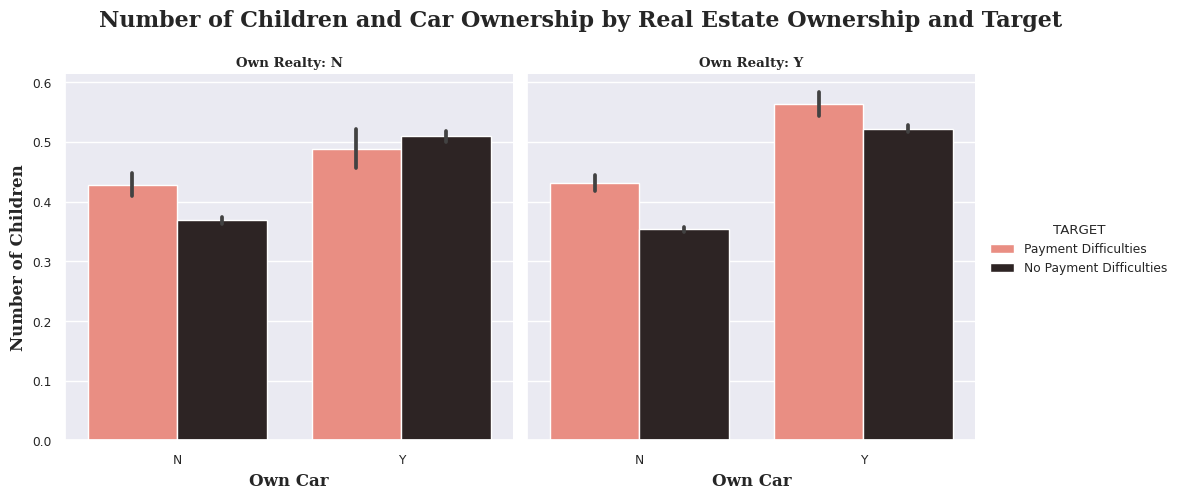

In [ ]:
sns.set(font_scale=0.8)
fig = sns.catplot(x='FLAG_OWN_CAR', y='CNT_CHILDREN', hue='TARGET', 
                  col='FLAG_OWN_REALTY', kind='bar', 
                  palette='dark:salmon_r', data=df)
fig.set_xlabels('Own Car', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_ylabels('Number of Children', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_titles(col_template='Own Realty: {col_name}', 
               fontsize=14, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(top=0.85)
plt.suptitle('Number of Children and Car Ownership by Real Estate Ownership and Target', 
             fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

DESKRIPSI
- Number of Children : Jumlah anak yang dimiliki klien
- Own Car : Klien Yang memiliki mobil
- Own Realty : Kliean yang memiliki rumah

INTERPRETASI
- Klien yang memiliki mobil dan rumah/flat memiliki masalah dalam mengembalikan 
pinjaman untuk jumlah anak yang tinggi dibandingkan dengan klien yang tidak memiliki rumah/flat.

### Type Of Education and Total Income by Real Estate Ownership and Target

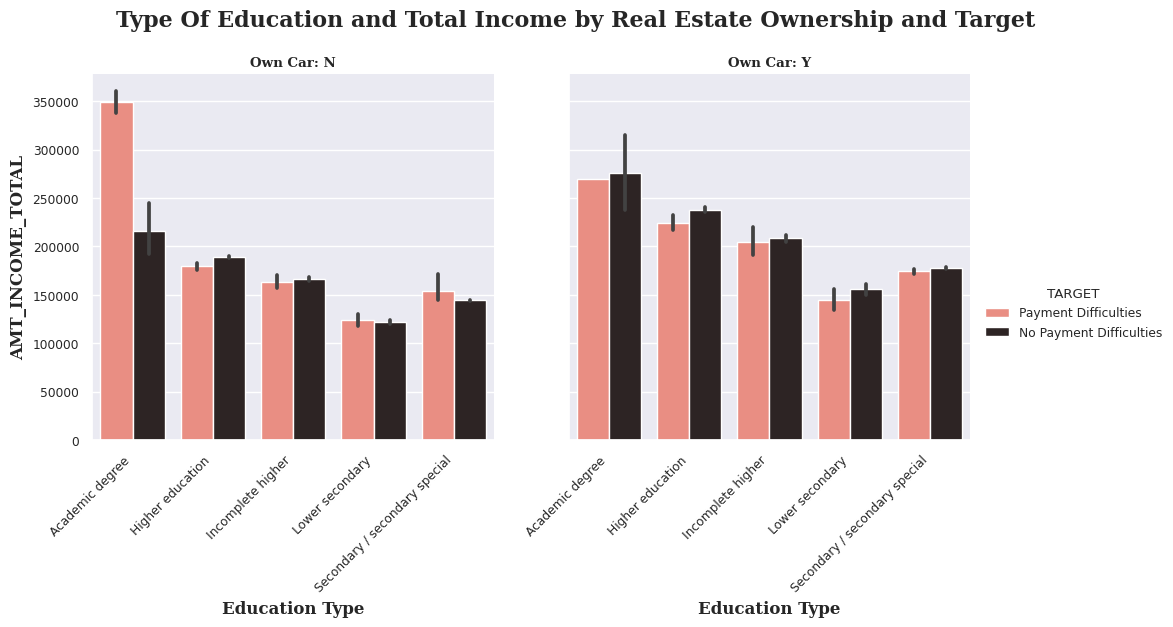

In [ ]:
sns.set(font_scale=0.8)
fig = sns.catplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', 
                  col='FLAG_OWN_CAR', kind='bar', 
                  palette="dark:salmon_r", data=df)
fig.set_xlabels('Education Type', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_xticklabels(rotation=45, horizontalalignment='right')
fig.set_ylabels('AMT_INCOME_TOTAL', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_titles(col_template='Own Car: {col_name}', 
               fontsize=14, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(top=0.85)
plt.suptitle('Type Of Education and Total Income by Real Estate Ownership and Target', 
             fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

DESKRIPSI
- Education Type : Tingkat Pendidikan Klien
- Own Car : Klien Yang Memiliki Mobil
- Amount income total : total pendapatan klien


INTERPRETASI
- Klien yang memiliki mobil dan pendidikan yang tinggi cenderung tidak memiliki masalah dalam 
mengembalikan pinjaman untuk jumlah income yang tinggi. 

- Tetapi, klien yang tidak memiliki mobil
dan berpendidikan tinggi cenderung memiliki masalah pengembalian pinjaman untuk income yang tinggi.


### Type Of Education and Total Income by Real Estate Ownership and Target

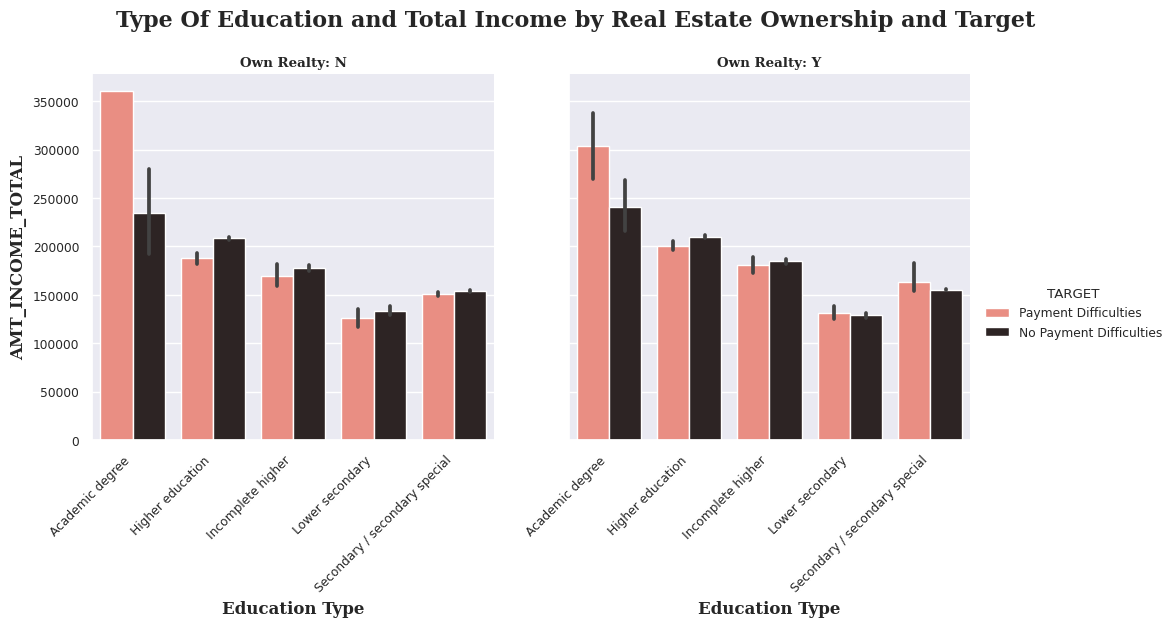

In [ ]:
sns.set(font_scale=0.8)
fig = sns.catplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='TARGET', 
                  col='FLAG_OWN_REALTY', kind='bar', 
                  palette="dark:salmon_r", data=df)
fig.set_xlabels('Education Type', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_xticklabels(rotation=45, horizontalalignment='right')
fig.set_ylabels('AMT_INCOME_TOTAL', fontsize=12, fontweight='bold', fontfamily='serif')
fig.set_titles(col_template='Own Realty: {col_name}', 
               fontsize=14, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(top=0.85)
plt.suptitle('Type Of Education and Total Income by Real Estate Ownership and Target', 
             fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

DESKRIPSI 
- Education Type : Tingkat Pendidikan Klien
- Own Realty : Klien Yang Memiliki Rumah
- Amount income total : total pendapatan klien

INTERPRETASI
- Di level academic degree, baik klien memiliki rumah ataupun tidak, memiliki permasalahanan
dalam pengembalian pinjaman untuk income yang tinggi.
- Sedangkan untuk education type di bawah academic degree yang tidak memiliki rumah, cenderung 
tidak memiliki permasalahan pengembalian pinjaman.


In [ ]:
df['TARGET'] = df['TARGET'].map({"No Payment Difficulties":0 , "Payment Difficulties":1})

# PREPROCESSING

### HANDLING MISSING VALUE

In [ ]:
df_null = missing_values[missing_values['null_pct'] > 50]
col_null = df_null['feature'].to_list()
col_null

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE']

In [ ]:
df2 = df.drop(col_null, axis = 1)
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018799       -9461           -637            -3648.0   
1                    0.003542      -16765          -1188            -1186.0   
2                    0.010033      -19046           -225            -4260.0   
3                    0.008018      -19005          -3039            -9832.0   
4                    0.028656      -19932          -3038            -4312.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
# df_2 info
list_item = []
for col in df2.columns:
    list_item.append([col, df2[col].dtype, df2[col].isna().sum(), 100*df2[col].isna().sum()/len(df2[col]), df2[col].nunique(), df2[col].unique()[:4]])
df2_info = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
df2_info

feature data_type  null_num   null_pct  unique_num  \
0                     SK_ID_CURR     int32         0   0.000000      307511   
1                         TARGET     int64         0   0.000000           2   
2             NAME_CONTRACT_TYPE  category         0   0.000000           2   
3                    CODE_GENDER  category         0   0.000000           3   
4                   FLAG_OWN_CAR  category         0   0.000000           2   
5                FLAG_OWN_REALTY  category         0   0.000000           2   
6                   CNT_CHILDREN      int8         0   0.000000          15   
7               AMT_INCOME_TOTAL   float32         0   0.000000        2548   
8                     AMT_CREDIT   float32         0   0.000000        5603   
9                    AMT_ANNUITY   float32        12   0.003902       13672   
10               AMT_GOODS_PRICE   float32       278   0.090403        1002   
11               NAME_TYPE_SUITE  category      1292   0.420148           7   
12              NAME_INCOME_TYPE  category         0   0.000000           8   
13           NAME_EDUCATION_TYPE  category         0   0.000000           5   
14            NAME_FAMILY_STATUS  category         0   0.000000           6   
15             NAME_HOUSING_TYPE  category         0   0.000000           6   
16    REGION_POPULATION_RELATIVE   float16         0   0.000000          81   
17                    DAYS_BIRTH     int16         0   0.000000       17460   
18                 DAYS_EMPLOYED     int32         0   0.000000       12574   
19             DAYS_REGISTRATION   float16         0   0.000000        5282   
20               DAYS_ID_PUBLISH     int16         0   0.000000        6168   
21                    FLAG_MOBIL      int8         0   0.000000           2   
22                FLAG_EMP_PHONE      int8         0   0.000000           2   
23               FLAG_WORK_PHONE      int8         0   0.000000           2   
24              FLAG_CONT_MOBILE      int8         0   0.000000           2   
25                    FLAG_PHONE      int8         0   0.000000           2   
26                    FLAG_EMAIL      int8         0   0.000000           2   
27               OCCUPATION_TYPE  category     96391  31.345545          18   
28               CNT_FAM_MEMBERS   float16         2   0.000650          17   
29          REGION_RATING_CLIENT      int8         0   0.000000           3   
30   REGION_RATING_CLIENT_W_CITY      int8         0   0.000000           3   
31    WEEKDAY_APPR_PROCESS_START  category         0   0.000000           7   
32       HOUR_APPR_PROCESS_START      int8         0   0.000000          24   
33    REG_REGION_NOT_LIVE_REGION      int8         0   0.000000           2   
34    REG_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
35   LIVE_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
36        REG_CITY_NOT_LIVE_CITY      int8         0   0.000000           2   
37        REG_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
38       LIVE_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
39             ORGANIZATION_TYPE  category         0   0.000000          58   
40                  EXT_SOURCE_2   float16       660   0.214626        6888   
41                  EXT_SOURCE_3   float16     60965  19.825307         814   
42   YEARS_BEGINEXPLUATATION_AVG   float16    150007  48.781019         284   
43                 FLOORSMAX_AVG   float16    153020  49.760822         403   
44  YEARS_BEGINEXPLUATATION_MODE   float16    150007  48.781019         221   
45                FLOORSMAX_MODE   float16    153020  49.760822          25   
46  YEARS_BEGINEXPLUATATION_MEDI   float16    150007  48.781019         244   
47                FLOORSMAX_MEDI   float16    153020  49.760822          49   
48                TOTALAREA_MODE   float16    148431  48.268517        3660   
49           EMERGENCYSTATE_MODE  category    145755  47.398304           2

#### NUMERICAL

In [ ]:
df2_num = df2_info[(df2_info['data_type'] != 'category') & (df2_info['data_type'] != 'object')]
col_num = df2_num['feature'].to_list()
df2_num

feature data_type  null_num   null_pct  unique_num  \
0                     SK_ID_CURR     int32         0   0.000000      307511   
1                         TARGET     int64         0   0.000000           2   
6                   CNT_CHILDREN      int8         0   0.000000          15   
7               AMT_INCOME_TOTAL   float32         0   0.000000        2548   
8                     AMT_CREDIT   float32         0   0.000000        5603   
9                    AMT_ANNUITY   float32        12   0.003902       13672   
10               AMT_GOODS_PRICE   float32       278   0.090403        1002   
16    REGION_POPULATION_RELATIVE   float16         0   0.000000          81   
17                    DAYS_BIRTH     int16         0   0.000000       17460   
18                 DAYS_EMPLOYED     int32         0   0.000000       12574   
19             DAYS_REGISTRATION   float16         0   0.000000        5282   
20               DAYS_ID_PUBLISH     int16         0   0.000000        6168   
21                    FLAG_MOBIL      int8         0   0.000000           2   
22                FLAG_EMP_PHONE      int8         0   0.000000           2   
23               FLAG_WORK_PHONE      int8         0   0.000000           2   
24              FLAG_CONT_MOBILE      int8         0   0.000000           2   
25                    FLAG_PHONE      int8         0   0.000000           2   
26                    FLAG_EMAIL      int8         0   0.000000           2   
28               CNT_FAM_MEMBERS   float16         2   0.000650          17   
29          REGION_RATING_CLIENT      int8         0   0.000000           3   
30   REGION_RATING_CLIENT_W_CITY      int8         0   0.000000           3   
32       HOUR_APPR_PROCESS_START      int8         0   0.000000          24   
33    REG_REGION_NOT_LIVE_REGION      int8         0   0.000000           2   
34    REG_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
35   LIVE_REGION_NOT_WORK_REGION      int8         0   0.000000           2   
36        REG_CITY_NOT_LIVE_CITY      int8         0   0.000000           2   
37        REG_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
38       LIVE_CITY_NOT_WORK_CITY      int8         0   0.000000           2   
40                  EXT_SOURCE_2   float16       660   0.214626        6888   
41                  EXT_SOURCE_3   float16     60965  19.825307         814   
42   YEARS_BEGINEXPLUATATION_AVG   float16    150007  48.781019         284   
43                 FLOORSMAX_AVG   float16    153020  49.760822         403   
44  YEARS_BEGINEXPLUATATION_MODE   float16    150007  48.781019         221   
45                FLOORSMAX_MODE   float16    153020  49.760822          25   
46  YEARS_BEGINEXPLUATATION_MEDI   float16    150007  48.781019         244   
47                FLOORSMAX_MEDI   float16    153020  49.760822          49   
48                TOTALAREA_MODE   float16    148431  48.268517        3660   
50      OBS_30_CNT_SOCIAL_CIRCLE   float16      1021   0.332021          33   
51      DEF_30_CNT_SOCIAL_CIRCLE   float16      1021   0.332021          10   
52      OBS_60_CNT_SOCIAL_CIRCLE   float16      1021   0.332021          33   
53      DEF_60_CNT_SOCIAL_CIRCLE   float16      1021   0.332021           9   
54        DAYS_LAST_PHONE_CHANGE   float16         1   0.000325        2957   
55               FLAG_DOCUMENT_2      int8         0   0.000000           2   
56               FLAG_DOCUMENT_3      int8         0   0.000000           2   
57               FLAG_DOCUMENT_4      int8         0   0.000000           2   
58               FLAG_DOCUMENT_5      int8         0   0.000000           2   
59               FLAG_DOCUMENT_6      int8         0   0.000000           2   
60               FLAG_DOCUMENT_7      int8         0   0.000000           2   
61               FLAG_DOCUMENT_8      int8         0   0.000000           2   
62               FLAG_DOCUMENT_9      int8         0   0.000000           2

In [ ]:
df2_null_num = df2_info[(df2_info['null_pct'] > 0) & (df2_info['data_type'] != 'category')]
col_null2_num = df2_null_num['feature'].to_list()
col_null2_num

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
# impute Graduated and Family_Size features with most_frequent values
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'median')
impute_mode.fit(df2[['AMT_ANNUITY',
                  'AMT_GOODS_PRICE',
                  'CNT_FAM_MEMBERS',
                  'EXT_SOURCE_2',
                  'EXT_SOURCE_3',
                  'YEARS_BEGINEXPLUATATION_AVG',
                  'FLOORSMAX_AVG',
                  'YEARS_BEGINEXPLUATATION_MODE',
                  'FLOORSMAX_MODE',
                  'YEARS_BEGINEXPLUATATION_MEDI',
                  'FLOORSMAX_MEDI',
                  'TOTALAREA_MODE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DAYS_LAST_PHONE_CHANGE',
                  'AMT_REQ_CREDIT_BUREAU_HOUR',
                  'AMT_REQ_CREDIT_BUREAU_DAY',
                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_QRT',
                  'AMT_REQ_CREDIT_BUREAU_YEAR']])

df2[['AMT_ANNUITY',
      'AMT_GOODS_PRICE',
      'CNT_FAM_MEMBERS',
      'EXT_SOURCE_2',
      'EXT_SOURCE_3',
      'YEARS_BEGINEXPLUATATION_AVG',
      'FLOORSMAX_AVG',
      'YEARS_BEGINEXPLUATATION_MODE',
      'FLOORSMAX_MODE',
      'YEARS_BEGINEXPLUATATION_MEDI',
      'FLOORSMAX_MEDI',
      'TOTALAREA_MODE',
      'OBS_30_CNT_SOCIAL_CIRCLE',
      'DEF_30_CNT_SOCIAL_CIRCLE',
      'OBS_60_CNT_SOCIAL_CIRCLE',
      'DEF_60_CNT_SOCIAL_CIRCLE',
      'DAYS_LAST_PHONE_CHANGE',
      'AMT_REQ_CREDIT_BUREAU_HOUR',
      'AMT_REQ_CREDIT_BUREAU_DAY',
      'AMT_REQ_CREDIT_BUREAU_WEEK',
      'AMT_REQ_CREDIT_BUREAU_MON',
      'AMT_REQ_CREDIT_BUREAU_QRT',
      'AMT_REQ_CREDIT_BUREAU_YEAR']] = impute_mode.transform(df2[['AMT_ANNUITY',
                                                                  'AMT_GOODS_PRICE',
                                                                  'CNT_FAM_MEMBERS',
                                                                  'EXT_SOURCE_2',
                                                                  'EXT_SOURCE_3',
                                                                  'YEARS_BEGINEXPLUATATION_AVG',
                                                                  'FLOORSMAX_AVG',
                                                                  'YEARS_BEGINEXPLUATATION_MODE',
                                                                  'FLOORSMAX_MODE',
                                                                  'YEARS_BEGINEXPLUATATION_MEDI',
                                                                  'FLOORSMAX_MEDI',
                                                                  'TOTALAREA_MODE',
                                                                  'OBS_30_CNT_SOCIAL_CIRCLE',
                                                                  'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                  'OBS_60_CNT_SOCIAL_CIRCLE',
                                                                  'DEF_60_CNT_SOCIAL_CIRCLE',
                                                                  'DAYS_LAST_PHONE_CHANGE',
                                                                  'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                                  'AMT_REQ_CREDIT_BUREAU_DAY',
                                                                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                                  'AMT_REQ_CREDIT_BUREAU_MON',
                                                                  'AMT_REQ_CREDIT_BUREAU_QRT',
                                                                  'AMT_REQ_CREDIT_BUREAU_YEAR']])

In [ ]:
min_max_df = pd.DataFrame(columns=['Column', 'Min', 'Max', 'Mean'])
for column in col_num:
    col_min = df2[column].min()
    col_max = df2[column].max()
    col_mean = df2[column].mean()
    min_max_df = min_max_df.append({'Column': column, 'Min': col_min, 'Max': col_max, 'Mean': col_mean}, ignore_index=True)
min_max_df

Column       Min          Max           Mean
0                     SK_ID_CURR    100002       456255  278180.518577
1                         TARGET         0            1       0.080729
2                   CNT_CHILDREN         0           19       0.417052
3               AMT_INCOME_TOTAL   25650.0  117000000.0  168797.921875
4                     AMT_CREDIT   45000.0    4050000.0  599025.937500
5                    AMT_ANNUITY    1615.5     258025.5   27108.484375
6                AMT_GOODS_PRICE   40500.0    4050000.0  538316.187500
7     REGION_POPULATION_RELATIVE   0.00029      0.07251       0.000000
8                     DAYS_BIRTH    -25229        -7489  -16036.995067
9                  DAYS_EMPLOYED    -17912       365243   63815.045904
10             DAYS_REGISTRATION  -24672.0          0.0            NaN
11               DAYS_ID_PUBLISH     -7197            0   -2994.202373
12                    FLAG_MOBIL         0            1       0.999997
13                FLAG_EMP_PHONE         0            1       0.819889
14               FLAG_WORK_PHONE         0            1       0.199368
15              FLAG_CONT_MOBILE         0            1       0.998133
16                    FLAG_PHONE         0            1       0.281066
17                    FLAG_EMAIL         0            1       0.056720
18               CNT_FAM_MEMBERS       1.0         20.0       2.152664
19          REGION_RATING_CLIENT         1            3       2.052463
20   REGION_RATING_CLIENT_W_CITY         1            3       2.031521
21       HOUR_APPR_PROCESS_START         0           23      12.063419
22    REG_REGION_NOT_LIVE_REGION         0            1       0.015144
23    REG_REGION_NOT_WORK_REGION         0            1       0.050769
24   LIVE_REGION_NOT_WORK_REGION         0            1       0.040659
25        REG_CITY_NOT_LIVE_CITY         0            1       0.078173
26        REG_CITY_NOT_WORK_CITY         0            1       0.230454
27       LIVE_CITY_NOT_WORK_CITY         0            1       0.179555
28                  EXT_SOURCE_2       0.0      0.85498       0.514503
29                  EXT_SOURCE_3  0.000527     0.895996       0.515671
30   YEARS_BEGINEXPLUATATION_AVG       0.0          1.0       0.979535
31                 FLOORSMAX_AVG       0.0          1.0       0.196660
32  YEARS_BEGINEXPLUATATION_MODE       0.0          1.0       0.979187
33                FLOORSMAX_MODE       0.0          1.0       0.194666
34  YEARS_BEGINEXPLUATATION_MEDI       0.0          1.0       0.979544
35                FLOORSMAX_MEDI       0.0          1.0       0.196466
36                TOTALAREA_MODE       0.0          1.0       0.086251
37      OBS_30_CNT_SOCIAL_CIRCLE       0.0        348.0       1.417523
38      DEF_30_CNT_SOCIAL_CIRCLE       0.0         34.0       0.142944
39      OBS_60_CNT_SOCIAL_CIRCLE       0.0        344.0       1.400626
40      DEF_60_CNT_SOCIAL_CIRCLE       0.0         24.0       0.099717
41        DAYS_LAST_PHONE_CHANGE   -4292.0          0.0    -962.858459
42               FLAG_DOCUMENT_2         0            1       0.000042
43               FLAG_DOCUMENT_3         0            1       0.710023
44               FLAG_DOCUMENT_4         0            1       0.000081
45               FLAG_DOCUMENT_5         0            1       0.015115
46               FLAG_DOCUMENT_6         0            1       0.088055
47               FLAG_DOCUMENT_7         0            1       0.000192
48               FLAG_DOCUMENT_8         0            1       0.081376
49               FLAG_DOCUMENT_9         0            1       0.003896
50              FLAG_DOCUMENT_10         0            1       0.000023
51              FLAG_DOCUMENT_11         0            1       0.003912
52              FLAG_DOCUMENT_12         0            1       0.000007
53              FLAG_DOCUMENT_13         0            1       0.003525
54              FLAG_DOCUMENT_14         0            1       0.002936
55              FLAG_DOCUMENT_15         0        

In [ ]:
df2['DAYS_LAST_PHONE_CHANGE'] = df2['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x*-1 if x!=0 else x )

In [ ]:
result_df = pd.DataFrame(columns=['Column', 'Min', 'Max', 'Mean'])
for column in col_num:
    col_min = df2[column].min()
    col_max = df2[column].max()
    col_mean = df2[column].mean()
    result_df = result_df.append({'Column': column, 'Min': col_min, 'Max': col_max, 'Mean': col_mean}, ignore_index=True)
result_df

Column       Min          Max           Mean
0                     SK_ID_CURR    100002       456255  278180.518577
1                         TARGET         0            1       0.080729
2                   CNT_CHILDREN         0           19       0.417052
3               AMT_INCOME_TOTAL   25650.0  117000000.0  168797.921875
4                     AMT_CREDIT   45000.0    4050000.0  599025.937500
5                    AMT_ANNUITY    1615.5     258025.5   27108.484375
6                AMT_GOODS_PRICE   40500.0    4050000.0  538316.187500
7     REGION_POPULATION_RELATIVE   0.00029      0.07251       0.000000
8                     DAYS_BIRTH    -25229        -7489  -16036.995067
9                  DAYS_EMPLOYED    -17912       365243   63815.045904
10             DAYS_REGISTRATION  -24672.0          0.0            NaN
11               DAYS_ID_PUBLISH     -7197            0   -2994.202373
12                    FLAG_MOBIL         0            1       0.999997
13                FLAG_EMP_PHONE         0            1       0.819889
14               FLAG_WORK_PHONE         0            1       0.199368
15              FLAG_CONT_MOBILE         0            1       0.998133
16                    FLAG_PHONE         0            1       0.281066
17                    FLAG_EMAIL         0            1       0.056720
18               CNT_FAM_MEMBERS       1.0         20.0       2.152664
19          REGION_RATING_CLIENT         1            3       2.052463
20   REGION_RATING_CLIENT_W_CITY         1            3       2.031521
21       HOUR_APPR_PROCESS_START         0           23      12.063419
22    REG_REGION_NOT_LIVE_REGION         0            1       0.015144
23    REG_REGION_NOT_WORK_REGION         0            1       0.050769
24   LIVE_REGION_NOT_WORK_REGION         0            1       0.040659
25        REG_CITY_NOT_LIVE_CITY         0            1       0.078173
26        REG_CITY_NOT_WORK_CITY         0            1       0.230454
27       LIVE_CITY_NOT_WORK_CITY         0            1       0.179555
28                  EXT_SOURCE_2       0.0      0.85498       0.514503
29                  EXT_SOURCE_3  0.000527     0.895996       0.515671
30   YEARS_BEGINEXPLUATATION_AVG       0.0          1.0       0.979535
31                 FLOORSMAX_AVG       0.0          1.0       0.196660
32  YEARS_BEGINEXPLUATATION_MODE       0.0          1.0       0.979187
33                FLOORSMAX_MODE       0.0          1.0       0.194666
34  YEARS_BEGINEXPLUATATION_MEDI       0.0          1.0       0.979544
35                FLOORSMAX_MEDI       0.0          1.0       0.196466
36                TOTALAREA_MODE       0.0          1.0       0.086251
37      OBS_30_CNT_SOCIAL_CIRCLE       0.0        348.0       1.417523
38      DEF_30_CNT_SOCIAL_CIRCLE       0.0         34.0       0.142944
39      OBS_60_CNT_SOCIAL_CIRCLE       0.0        344.0       1.400626
40      DEF_60_CNT_SOCIAL_CIRCLE       0.0         24.0       0.099717
41        DAYS_LAST_PHONE_CHANGE       0.0       4292.0     962.858376
42               FLAG_DOCUMENT_2         0            1       0.000042
43               FLAG_DOCUMENT_3         0            1       0.710023
44               FLAG_DOCUMENT_4         0            1       0.000081
45               FLAG_DOCUMENT_5         0            1       0.015115
46               FLAG_DOCUMENT_6         0            1       0.088055
47               FLAG_DOCUMENT_7         0            1       0.000192
48               FLAG_DOCUMENT_8         0            1       0.081376
49               FLAG_DOCUMENT_9         0            1       0.003896
50              FLAG_DOCUMENT_10         0            1       0.000023
51              FLAG_DOCUMENT_11         0            1       0.003912
52              FLAG_DOCUMENT_12         0            1       0.000007
53              FLAG_DOCUMENT_13         0            1       0.003525
54              FLAG_DOCUMENT_14         0            1       0.002936
55              FLAG_DOCUMENT_15         0        

In [ ]:
# convert to year
df2['AGE'] = round((df2['DAYS_BIRTH']/365).abs(),0).astype(int)
df2['YEAR_EMP'] = round((df2['DAYS_EMPLOYED']/365).abs(),0).astype(int)
df2['YEAR_REGISTERED'] = round((df2['DAYS_REGISTRATION']/365).abs(),0).astype(int)
df2['YEAR_PUBLISHED'] = round((df2['DAYS_ID_PUBLISH']/365).abs(),0).astype(int)
df2 = df2.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], axis=1)

In [ ]:
df2.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      0
REGION_RATING_CLIENT     

#### CATEGORICAL

In [ ]:
df2_cat = df2_info[(df2_info['data_type'] == 'category') | (df2_info['data_type'] == 'object')]
col_cat = df2_cat['feature'].to_list()
df2_cat

feature data_type  null_num   null_pct  unique_num  \
2           NAME_CONTRACT_TYPE  category         0   0.000000           2   
3                  CODE_GENDER  category         0   0.000000           3   
4                 FLAG_OWN_CAR  category         0   0.000000           2   
5              FLAG_OWN_REALTY  category         0   0.000000           2   
11             NAME_TYPE_SUITE  category      1292   0.420148           7   
12            NAME_INCOME_TYPE  category         0   0.000000           8   
13         NAME_EDUCATION_TYPE  category         0   0.000000           5   
14          NAME_FAMILY_STATUS  category         0   0.000000           6   
15           NAME_HOUSING_TYPE  category         0   0.000000           6   
27             OCCUPATION_TYPE  category     96391  31.345545          18   
31  WEEKDAY_APPR_PROCESS_START  category         0   0.000000           7   
39           ORGANIZATION_TYPE  category         0   0.000000          58   
49         EMERGENCYSTATE_MODE  category    145755  47.398304           2   

                                        unique_sample  
2   ['Cash loans', 'Revolving loans']
Categories (...  
3   ['M', 'F', 'XNA']
Categories (3, object): ['F'...  
4       ['N', 'Y']
Categories (2, object): ['N', 'Y']  
5       ['Y', 'N']
Categories (2, object): ['N', 'Y']  
11  ['Unaccompanied', 'Family', 'Spouse, partner',...  
12  ['Working', 'State servant', 'Commercial assoc...  
13  ['Secondary / secondary special', 'Higher educ...  
14  ['Single / not married', 'Married', 'Civil mar...  
15  ['House / apartment', 'Rented apartment', 'Wit...  
27  ['Laborers', 'Core staff', 'Accountants', 'Man...  
31  ['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY']
...  
39  ['Business Entity Type 3', 'School', 'Governme...  
49  ['No', NaN, 'Yes']
Categories (2, object): ['N...

In [ ]:
df2_null_cat = df2_info[(df2_info['null_pct'] > 0) & (df2_info['data_type'] == 'category')]
col_null2_cat = df2_null_cat['feature'].to_list()
col_null2_cat

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']

In [ ]:
# impute Graduated and Family_Size features with most_frequent values
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df2[['NAME_TYPE_SUITE',
                    'OCCUPATION_TYPE',
                    'EMERGENCYSTATE_MODE']])

df2[['NAME_TYPE_SUITE','OCCUPATION_TYPE','EMERGENCYSTATE_MODE']] = impute_mode.transform(df2[['NAME_TYPE_SUITE','OCCUPATION_TYPE','EMERGENCYSTATE_MODE']])

In [ ]:
df2.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT

### FEATURE ENCODING

In [ ]:
for i in col_cat :
  print("\n")
  print(i)
  print( df2[i].unique())



NAME_CONTRACT_TYPE
['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']


CODE_GENDER
['M', 'F', 'XNA']
Categories (3, object): ['F', 'M', 'XNA']


FLAG_OWN_CAR
['N', 'Y']
Categories (2, object): ['N', 'Y']


FLAG_OWN_REALTY
['Y', 'N']
Categories (2, object): ['N', 'Y']


NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


NAME_INCOME_TYPE
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner',
                         'State servant', 'Student', 'Unemployed', 'Working']


NAME_EDUCATION_TYPE
['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Categories (5, object): ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary',
                  

#### DROP FEATURE THAT CONTAIN TOO MUCH CATEGORY

In [ ]:
df2 = df2.drop("ORGANIZATION_TYPE", axis = 1)
df2 = df2.drop("OCCUPATION_TYPE", axis = 1)

#### LABEL ENCODING

In [ ]:
# Label encoding
df2['CODE_GENDER'] = df2['CODE_GENDER'].map({'F':0, 'M':1,'XNA':0})
df2['FLAG_OWN_CAR'] = df2['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
df2['FLAG_OWN_REALTY'] = df2['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})
df2['NAME_CONTRACT_TYPE'] = df2['NAME_CONTRACT_TYPE'].map({'Cash loans':0, 'Revolving loans':1})
df2['EMERGENCYSTATE_MODE'] = df2['EMERGENCYSTATE_MODE'].map({'No':0, 'Yes':1})


#### REPLACE NON-DOMINANT TO DOMINANT VALUE

In [ ]:
# replace very non dominant values in categorical feature with dominan values
df2['NAME_INCOME_TYPE'] = np.where(df2['NAME_INCOME_TYPE'] == 'Maternity leave', 'Working', df2['NAME_INCOME_TYPE'])
df2['NAME_FAMILY_STATUS'] = np.where(df2['NAME_FAMILY_STATUS'] == 'Unknown', 'Married', df2['NAME_FAMILY_STATUS'])

#### ONE HOT ENCODING

In [ ]:
dummies =[pd.get_dummies(data['NAME_TYPE_SUITE'], prefix = 'NAME_TYPE_SUITE', prefix_sep = ':'),
          pd.get_dummies(data['NAME_INCOME_TYPE'], prefix = 'NAME_INCOME_TYPE', prefix_sep = ':'),
          pd.get_dummies(data['NAME_EDUCATION_TYPE'], prefix = 'NAME_EDUCATION_TYPE', prefix_sep = ':'),
          pd.get_dummies(data['NAME_FAMILY_STATUS'], prefix = 'NAME_FAMILY_STATUS', prefix_sep = ':'),
          pd.get_dummies(data['NAME_HOUSING_TYPE'], prefix = 'NAME_HOUSING_TYPE', prefix_sep = ':'),
          pd.get_dummies(data['WEEKDAY_APPR_PROCESS_START'], prefix = 'WEEKDAY_APPR_PROCESS_START', prefix_sep = ':'),
          pd.get_dummies(data['HOUSETYPE_MODE'], prefix = 'HOUSETYPE_MODE', prefix_sep = ':'),
          pd.get_dummies(data['WALLSMATERIAL_MODE'], prefix = 'WALLSMATERIAL_MODE', prefix_sep = ':'),
          pd.get_dummies(data['EMERGENCYSTATE_MODE'], prefix = 'EMERGENCYSTATE_MODE', prefix_sep = ':')]

In [ ]:
df_dummies = pd.concat(dummies, axis = 1)
df3 = pd.concat([df2, df_dummies], axis=1)
df3 = df3.drop(['NAME_TYPE_SUITE',
                  'NAME_INCOME_TYPE',
                  'NAME_EDUCATION_TYPE',
                  'NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE',
                  'WEEKDAY_APPR_PROCESS_START',
                  'EMERGENCYSTATE_MODE'], axis=1)

# MODEL PREPARATION

### SPLIT X AND Y

In [ ]:
x = df3.drop(['SK_ID_CURR','TARGET'], axis=1)
y = df3['TARGET']

## FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

def featureSelect_dataframe(X, y, criteria, k):
    reg = SelectKBest(criteria, k=k).fit(X,y)
    X_transformed = reg.transform(X)
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
    df = pd.DataFrame(X)
    return df

In [ ]:
x_best = featureSelect_dataframe(x, y, chi2, 40)
x_best.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AGE', 'YEAR_EMP', 'YEAR_REGISTERED',
       'YEAR_PUBLISHED', 'NAME_INCOME_TYPE:Pensioner',
       'NAME_INCOME_TYPE:State servant', 'NAME_INCOME_TYPE:Working',
       'NAME_EDUCATION_TYPE:Higher education',
       'NAME_EDUCATION_TYPE:Secondary / secondary special',
       'NAME_FAMILY_STATUS:Civil marriage',
       'NAME_FAMILY_STATUS:Single / not married',
       'NAME_HOUSING_TYPE:Rented apartment', 'NAME_HOUSING_T

In [ ]:
df4 = df3[['SK_ID_CURR', 'TARGET',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AGE', 'YEAR_EMP', 'YEAR_REGISTERED',
       'YEAR_PUBLISHED', 'NAME_INCOME_TYPE:Pensioner',
       'NAME_INCOME_TYPE:State servant', 'NAME_INCOME_TYPE:Working',
       'NAME_EDUCATION_TYPE:Higher education',
       'NAME_EDUCATION_TYPE:Secondary / secondary special',
       'NAME_FAMILY_STATUS:Civil marriage',
       'NAME_FAMILY_STATUS:Single / not married',
       'NAME_HOUSING_TYPE:Rented apartment', 'NAME_HOUSING_TYPE:With parents',
       'HOUSETYPE_MODE:block of flats', 'WALLSMATERIAL_MODE:Panel',
       'EMERGENCYSTATE_MODE:No'
]]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   SK_ID_CURR                                         307511 non-null  int32   
 1   TARGET                                             307511 non-null  int64   
 2   NAME_CONTRACT_TYPE                                 307511 non-null  category
 3   CODE_GENDER                                        307511 non-null  int64   
 4   CNT_CHILDREN                                       307511 non-null  int8    
 5   AMT_INCOME_TOTAL                                   307511 non-null  float32 
 6   AMT_CREDIT                                         307511 non-null  float32 
 7   AMT_ANNUITY                                        307511 non-null  float32 
 8   AMT_GOODS_PRICE                                    307511 non-nu

In [ ]:
df4.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  CODE_GENDER  CNT_CHILDREN  \
0      100002       1                  0            1             0   
1      100003       0                  0            0             0   
2      100004       0                  1            1             0   
3      100006       0                  0            0             0   
4      100007       0                  0            1             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  FLAG_EMP_PHONE  \
0          202500.0    406597.5      24700.5         351000.0               1   
1          270000.0   1293502.5      35698.5        1129500.0               1   
2           67500.0    135000.0       6750.0         135000.0               1   
3          135000.0    312682.5      29686.5         297000.0               1   
4          121500.0    513000.0      21865.5         513000.0               1   

   FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                0           1                     2   
1                0           1                     1   
2                1           1                     2   
3                0           0                     2   
4                0           0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262939      0.139404                       2.0   
1      0.622070      0.535156                       0.0   
2      0.556152      0.729492                       0.0   
3      0.650391      0.535156                       0.0   
4      0.322754      0.535156                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0                       2.0                  1134.0                1   
1                       0.0                   828.0                1   
2                       0.0                   815.0                0   
3                       0.0                   617.0                1   
4                       0.0                  1106.0                0   

   FLAG_DOCUMENT_6  AMT_REQ_CREDIT_BUREAU_MON  AGE  YEAR_EMP  YEAR_REGISTERED  \
0                0                        0.0   26         2               10   
1                0                        0.0   46         3                3   
2                0                        0.0   52         1               12   
3                0                        0.0   52         8               27   
4                0                        0.0   55         8               12   

   YEAR_PUBLISHED  NAME_INCOME_TYPE:Pensioner  NAME_INCOME_TYPE:State servant  \
0               6                           0                               0   
1               1                           0                               1   
2               7                           0                               0   
3               7                           0                               0   
4               9                           0                               0   

   NAME_INCOME_TYPE:Working  NAME_EDUCATION_TYPE:Higher education  \
0                         1                                     0   
1                         0 

## TRAIN TEST SPLIT

In [ ]:
x = df4.drop(['SK_ID_CURR','TARGET'], axis=1)
y = df4['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

x_train.shape, x_test.shape

((246008, 40), (61503, 40))

In [ ]:
y_train.value_counts()/len(y_train)*100

0    91.929124
1     8.070876
Name: TARGET, dtype: float64

## IMBALANCE OVERSAMPLING

In [ ]:
sm = SMOTE(random_state = 7)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)
y_smote.value_counts()/len(y_smote)*100

0    50.0
1    50.0
Name: TARGET, dtype: float64

In [ ]:
x_smote.isna().sum()

NAME_CONTRACT_TYPE                                   7505
CODE_GENDER                                             0
CNT_CHILDREN                                            0
AMT_INCOME_TOTAL                                        0
AMT_CREDIT                                              0
AMT_ANNUITY                                             0
AMT_GOODS_PRICE                                         0
FLAG_EMP_PHONE                                          0
FLAG_WORK_PHONE                                         0
FLAG_PHONE                                              0
REGION_RATING_CLIENT                                    0
REGION_RATING_CLIENT_W_CITY                             0
HOUR_APPR_PROCESS_START                                 0
REG_CITY_NOT_LIVE_CITY                                  0
REG_CITY_NOT_WORK_CITY                                  0
LIVE_CITY_NOT_WORK_CITY                                 0
EXT_SOURCE_2                                            0
EXT_SOURCE_3  

In [ ]:
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(x_smote[["NAME_CONTRACT_TYPE"]])

x_smote[["NAME_CONTRACT_TYPE"]] = impute_mode.transform(x_smote[["NAME_CONTRACT_TYPE"]])

In [ ]:
sm = SMOTE(random_state = 7)
sm.fit(x_test, y_test)
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)
y_test_smote.value_counts()/len(y_test_smote)*100

1    50.0
0    50.0
Name: TARGET, dtype: float64

In [ ]:
x_test_smote.isna().sum()

NAME_CONTRACT_TYPE                                   2540
CODE_GENDER                                             0
CNT_CHILDREN                                            0
AMT_INCOME_TOTAL                                        0
AMT_CREDIT                                              0
AMT_ANNUITY                                             0
AMT_GOODS_PRICE                                         0
FLAG_EMP_PHONE                                          0
FLAG_WORK_PHONE                                         0
FLAG_PHONE                                              0
REGION_RATING_CLIENT                                    0
REGION_RATING_CLIENT_W_CITY                             0
HOUR_APPR_PROCESS_START                                 0
REG_CITY_NOT_LIVE_CITY                                  0
REG_CITY_NOT_WORK_CITY                                  0
LIVE_CITY_NOT_WORK_CITY                                 0
EXT_SOURCE_2                                            0
EXT_SOURCE_3  

In [ ]:
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(x_test_smote[["NAME_CONTRACT_TYPE"]])

x_test_smote[["NAME_CONTRACT_TYPE"]] = impute_mode.transform(x_test_smote[["NAME_CONTRACT_TYPE"]])

## FEATURE SCALING

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_smote)
X_test = scaler.fit_transform(x_test_smote)

# MODEL BUILDING

## CREATE PIPELINE

In [ ]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(RidgeClassifier())

In [ ]:
model_list = ['Logistic Regression','KNN','Decison Tree','Random Forest', 'Naive Bayes', 'Ridge Classifier']
acc_list = []
auc_list = []
cm_list = []
f1_list = []

## MODEL & EVALUATION

In [ ]:
for model in model_pipeline :
  model.fit(X_train, y_smote)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test_smote,y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test_smote,y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_test_smote,y_pred))
  f1_list.append(f1_score(y_test_smote,y_pred))
  print(model)
  print(classification_report(y_test_smote,y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     56533
           1       0.86      0.85      0.85     56533

    accuracy                           0.85    113066
   macro avg       0.85      0.85      0.85    113066
weighted avg       0.85      0.85      0.85    113066

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     56533
           1       0.85      0.83      0.84     56533

    accuracy                           0.85    113066
   macro avg       0.85      0.85      0.85    113066
weighted avg       0.85      0.85      0.85    113066

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.70      0.73      0.71     56533
           1       0.72      0.68      0.70     56533

    accuracy                           0.71    113066
   macro avg       0.71      0.71      0.71    113066
weigh

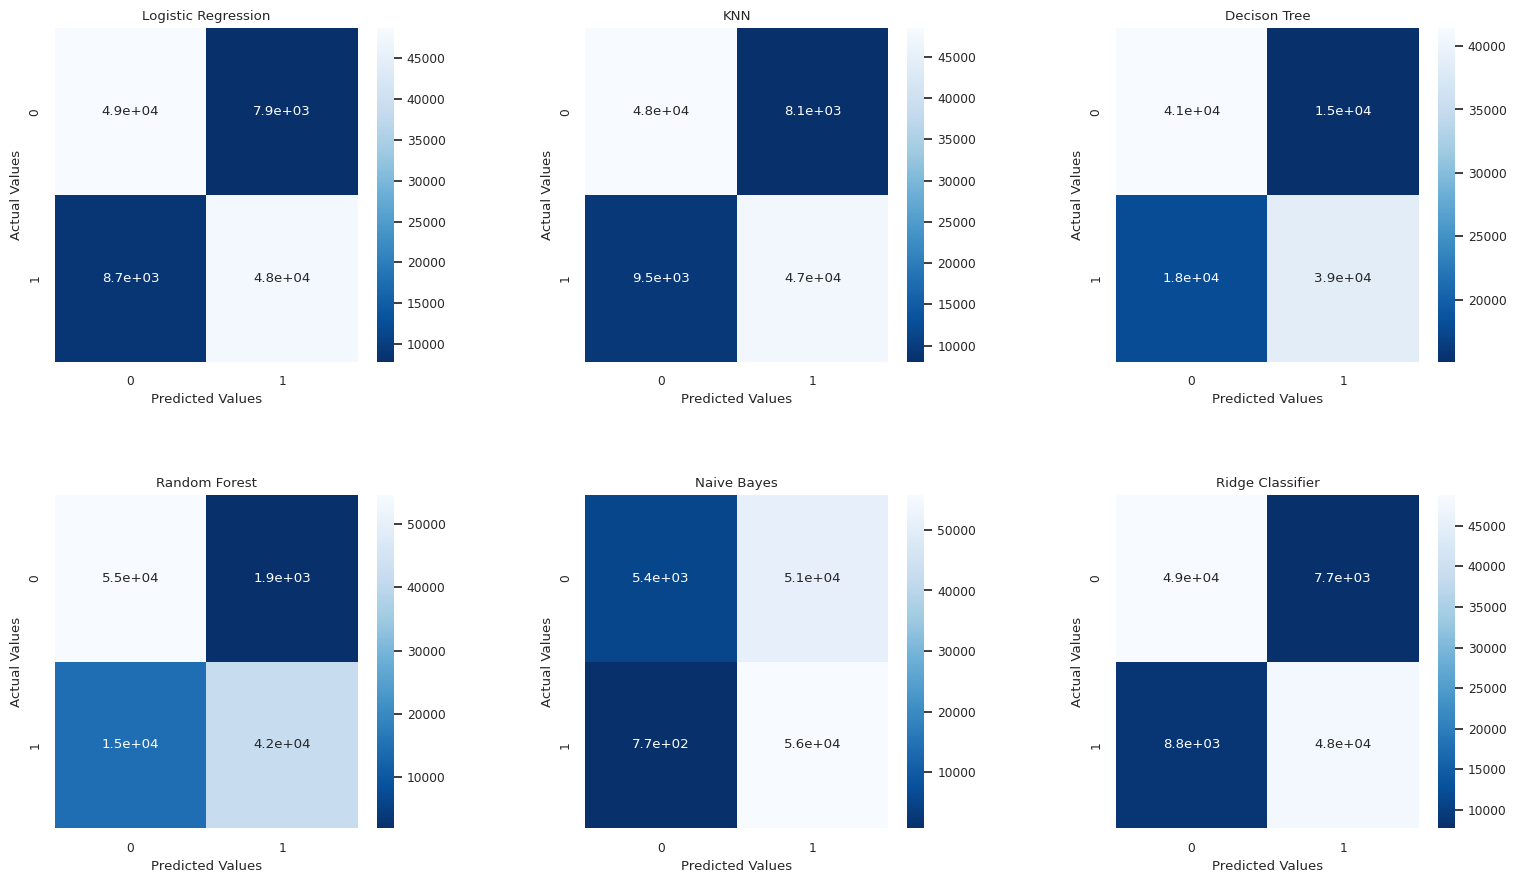

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [ ]:
result_df = pd.DataFrame({'Model' : model_list,
                          'Accuracy' : acc_list,
                          'AUC' : auc_list,
                          'F1'  : f1_list})
result_df

Model  Accuracy   AUC        F1
0  Logistic Regression  0.853263  0.85  0.852102
1                  KNN  0.845082  0.85  0.843134
2         Decison Tree  0.707065  0.71  0.699476
3        Random Forest  0.854342  0.85  0.835994
4          Naive Bayes  0.541409  0.54  0.682638
5     Ridge Classifier  0.853404  0.85  0.851989

# MODEL SELECTION

In [ ]:
x = df4.drop(['SK_ID_CURR','TARGET'], axis=1).values
y = df4['TARGET'].values

In [ ]:
sm = SMOTE(random_state = 7)
sm.fit(x, y)
x_smote2, y_smote2 = sm.fit_resample(x, y)

In [ ]:
scaler = MinMaxScaler()
X_smote2 = scaler.fit_transform(x_smote2)

### STRATIFIED K-FOLD

In [ ]:
clf = LogisticRegression()

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_smote2, y_smote2, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.68701304 0.69270838 0.69349276 0.69512885 0.6954826 ]
Average CV Score:  0.6927651277545256
Number of CV Scores used in Average:  5


In [ ]:
clf = KNeighborsClassifier()

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_smote2, y_smote2, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85969489 0.91691355 0.91761148 0.91702779 0.91647063]
Average CV Score:  0.9055436676717094
Number of CV Scores used in Average:  5


In [ ]:
clf = RandomForestClassifier()

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_smote2, y_smote2, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.77988945 0.99904488 0.99898297 0.99896528 0.99911562]
Average CV Score:  0.9551996410592432
Number of CV Scores used in Average:  5


In [ ]:
clf = RidgeClassifier()

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_smote2, y_smote2, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.68757904 0.69378731 0.69387304 0.69661461 0.6966942 ]
Average CV Score:  0.6937096390569896
Number of CV Scores used in Average:  5
